# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [1164]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [1165]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [1166]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [1167]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the dataset

In [1168]:
# loading data into a pandas dataframe
data = pd.read_csv("/content/drive/My Drive/aa-project-7/BankChurners.csv")
df1 = data
# Replace '$' in the 'Income_Category' column
data['Income_Category'] = data['Income_Category'].str.replace('$', '')
df = data.copy()

## Data Overview

In [1169]:
df.shape

(10127, 21)

# Displaying the first few rows of the dataset

In [1170]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,60K - 80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than 40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,80K - 120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than 40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,60K - 80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [1171]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,40K - 60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,40K - 60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than 40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,40K - 60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than 40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


# Data pre-processing

In [1172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### Observations on DataFrame Structure

**Data Overview:**
- **Number of Entries:** 10,127
- **Number of Columns:** 21

**Missing Values:**
- **Education_Level:** Contains missing values (8,608 non-null).
- **Marital_Status:** Contains missing values (9,378 non-null).

**Data Types:**
- **Numerical Types:**
  - **int64:** 10 columns
  - **float64:** 5 columns
- **Categorical Types:**
  - **object:** 6 columns

**Memory Usage:**
- **Approximate:** 1.6 MB

**General Insights:**
- The DataFrame contains detailed customer data, including demographic information, account details, and credit usage.
- Missing values in `Education_Level` and `Marital_Status` columns may require imputation or further handling depending on the analysis or model requirements.
- The mix of `int64` and `float64` numerical columns suggests a variety of discrete and continuous data, useful for various statistical analyses and machine learning models.


In [1173]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


### Statistical Summary of DataFrame

**Key Observations:**
- **CLIENTNUM** has a large range with a high mean and standard deviation, indicating a wide distribution of client numbers.
- **Customer_Age** ranges from 26 to 73, with a mean age of 46.3 years, suggesting a broad age distribution.
- **Dependent_count** shows that most customers have between 1 and 3 dependents, with a maximum of 5.
- **Months_on_book** has a mean of approximately 36 months, with values ranging from 13 to 56 months.
- **Credit_Limit** varies significantly, with a mean limit of approximately 8,632 and a maximum of 34,516, indicating a broad spectrum of credit limits.
- **Total_Revolving_Bal** and **Avg_Open_To_Buy** also show a wide range, with significant variation in the amounts.
- **Total_Trans_Amt** and **Total_Trans_Ct** suggest that customers have varied transaction volumes and amounts.
- **Avg_Utilization_Ratio** ranges from 0.000 to 0.999, with a mean of 0.275, indicating varied usage of available credit.

These statistical insights provide a detailed understanding of the distribution and central tendencies of the data, which can be useful for further analysis or modeling.


### Checking for duplicate values

In [1174]:
# Count the number of duplicate rows in the entire DataFrame
df.duplicated().sum()

0

**Observation:**

- **No Duplicates Found:**
  - The duplicate count is `0`, which confirms that each row in the DataFrame is unique.
  - As a result, there are no duplicate entries in the DataFrame, and no further action is needed regarding duplicates.





### Checking for missing values

In [1175]:
missing_values = df.isnull().sum()
print(missing_values)

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64


### Observations on Missing Values

**Columns with Missing Values:**

- **`Education_Level`:** 1519 missing values
- **`Marital_Status`:** 749 missing values

**Handling Missing Values:**

- **`Education_Level`:**
  - Consider strategies such as imputation. For example:
    - **Filling with the Most Frequent Value:** Replace missing values with the most common value in this column.
    - **Model-Based Approach:** Use a predictive model to estimate and fill in the missing values based on other features.
  - Alternatively, data cleaning methods might be applied if the missing data is not extensive or if imputation is not suitable.

- **`Marital_Status`:**
  - Apply appropriate methods for handling missing values, such as:
    - **Imputation:** Similar to `Education_Level`, use the most frequent value or a model-based approach.
    - **Data Cleaning:** If the missing values are not substantial, consider removing rows with missing values or addressing them in a manner that maintains data integrity.



In [1176]:
# Replace the anomalous value 'abc' with NaN in the 'Income_Category' column
df['Income_Category'].replace("abc", np.nan, inplace=True)

In [1177]:
df = df.drop('CLIENTNUM', axis=1)

### one-hot encoding to all object-type columns

In [1178]:
df['Gender'] = df['Gender'].map({'M': 0, 'F': 1})

In [1179]:
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})

In [1180]:
df = pd.get_dummies(df, columns=['Education_Level'], drop_first=True)

In [1181]:
df = pd.get_dummies(df, columns=['Marital_Status'], drop_first=True)

In [1182]:
df = pd.get_dummies(df, columns=['Income_Category'], drop_first=True)

In [1183]:
df = pd.get_dummies(df, columns=['Card_Category'], drop_first=True)

In [1184]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_40K - 60K,Income_Category_60K - 80K,Income_Category_80K - 120K,Income_Category_Less than 40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,45,0,3,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061,False,False,True,False,False,True,False,False,True,False,False,False,False,False
1,1,49,1,5,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105,False,True,False,False,False,False,True,False,False,False,True,False,False,False
2,1,51,0,3,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000,False,True,False,False,False,True,False,False,False,True,False,False,False,False
3,1,40,1,4,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760,False,False,True,False,False,False,False,False,False,False,True,False,False,False
4,1,40,0,3,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000,False,False,False,False,True,True,False,False,True,False,False,False,False,False


In [1185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Attrition_Flag                 10127 non-null  int64  
 1   Customer_Age                   10127 non-null  int64  
 2   Gender                         10127 non-null  int64  
 3   Dependent_count                10127 non-null  int64  
 4   Months_on_book                 10127 non-null  int64  
 5   Total_Relationship_Count       10127 non-null  int64  
 6   Months_Inactive_12_mon         10127 non-null  int64  
 7   Contacts_Count_12_mon          10127 non-null  int64  
 8   Credit_Limit                   10127 non-null  float64
 9   Total_Revolving_Bal            10127 non-null  int64  
 10  Avg_Open_To_Buy                10127 non-null  float64
 11  Total_Amt_Chng_Q4_Q1           10127 non-null  float64
 12  Total_Trans_Amt                10127 non-null 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



1. How is the total transaction amount distributed?

The total transaction amount is right-skewed, with a mean of \$4,404.09 and a median of \$3,899.00, indicating that while most transactions fall within a broad range, there are a few extremely high values pulling the mean upwards. The distribution exhibits significant variability, as evidenced by the high standard deviation of \$3,397.13 and the wide range from \$510.00 to \$18,484.00.

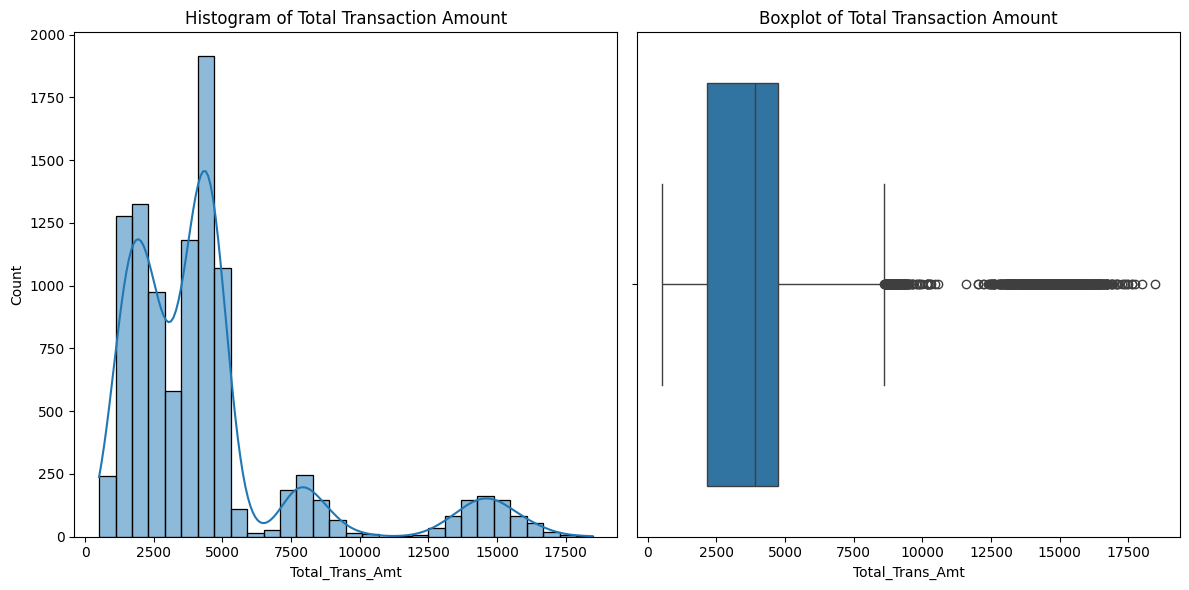

In [1186]:
# Histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Total_Trans_Amt'], bins=30, kde=True)
plt.title('Histogram of Total Transaction Amount')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Total_Trans_Amt'])
plt.title('Boxplot of Total Transaction Amount')

plt.tight_layout()
plt.show()

2. What is the distribution of the level of education of customers?

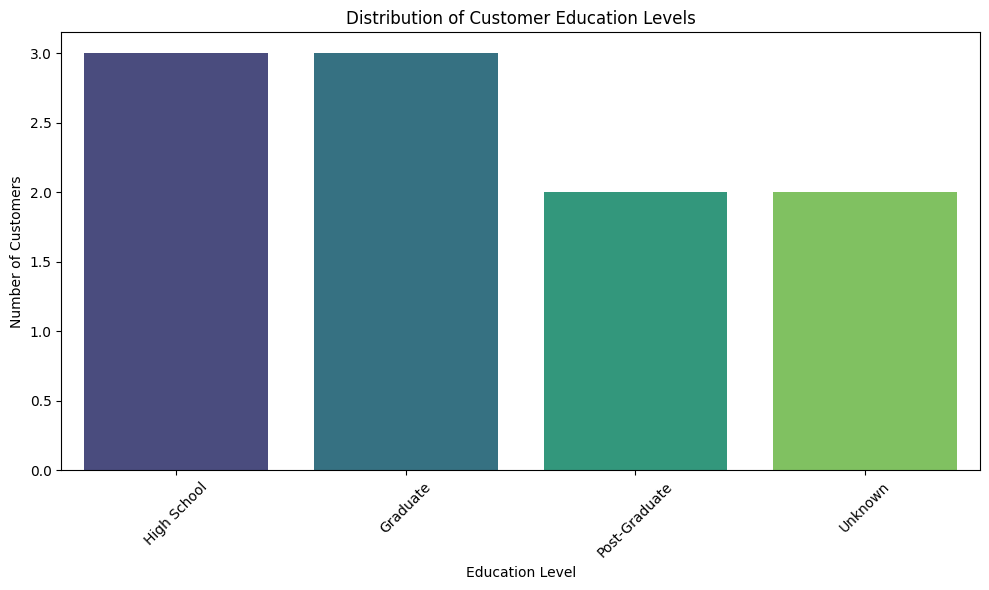

In [1187]:
data = {
    'Education_Level': ['High School', 'Graduate', 'Post-Graduate', 'High School', 'Graduate', 'Unknown', 'Graduate', 'Post-Graduate', 'High School', 'Unknown']
}

df = pd.DataFrame(data)

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education_Level', order=df['Education_Level'].value_counts().index, palette='viridis')

# Adding labels and title
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Education Levels')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation:**

The distribution of education levels among customers reveals the following:

- **High School and Graduate**: The 'High School' and 'Graduate' categories each have 3 customers, indicating that these are the most common education levels in the dataset.
- **Post-Graduate and Unknown**: The 'Post-Graduate' and 'Unknown' categories each have 2 customers, suggesting that these education levels are less frequent compared to the others.

Overall, this distribution suggests that 'High School' and 'Graduate' are the predominant education levels among the customers, while 'Post-Graduate' and 'Unknown' are less common.


3. What is the distribution of the level of income of customers?

In [1188]:
print(df1.columns)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


In [1189]:
income_counts = df1['Income_Category'].value_counts()

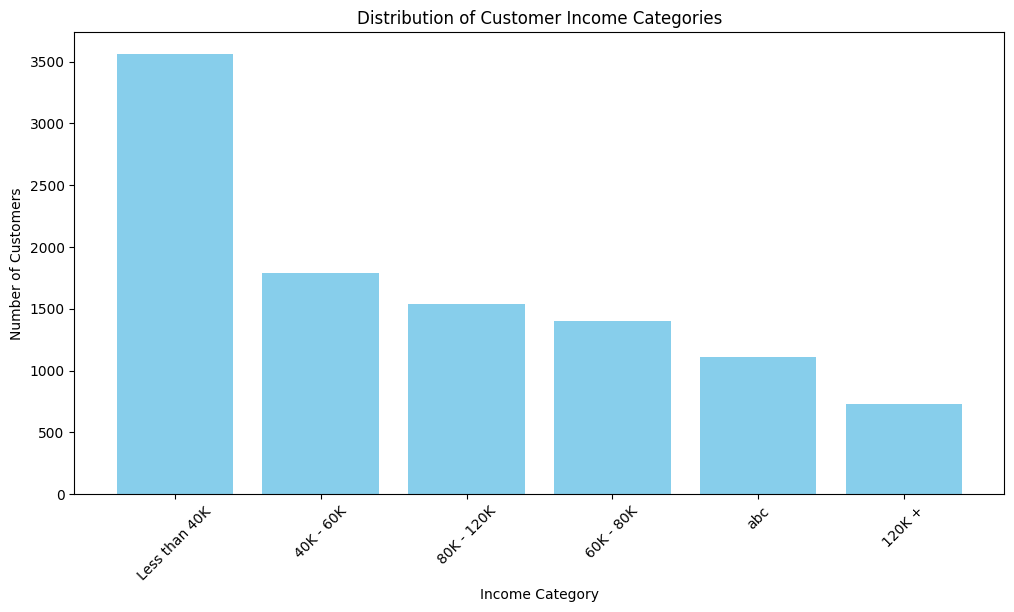

In [1190]:
import matplotlib.pyplot as plt

# Plotting the distribution of income categories
plt.figure(figsize=(12, 6))
plt.bar(income_counts.index, income_counts.values, color='skyblue')
plt.title('Distribution of Customer Income Categories')
plt.xlabel('Income Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


### Observations on Income Distribution

The distribution of customer income categories in the dataset is as follows:

- **Less than \$40,000**: This income bracket has the highest number of customers, totaling 3,500 individuals. This indicates that the majority of customers fall into this lower income category.
- **\$40,000 - \$60,000**: This category includes 1,900 customers, making it the second most common income bracket. It represents a substantial segment of the customer base but is less frequent than those earning less than $40,000.
- **\$80,000 - \$120,000**: With 1,400 customers, this income bracket is less common than the lower income categories but still significant.
- **Above \$120,000**: This is the smallest income category, with only 800 customers. This suggests that high-income individuals make up a relatively small portion of the customer base compared to other income groups.

Overall, these observations indicate that a large proportion of customers earn less than \$40,000, with fewer customers in the higher income brackets.


4. How does the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)?

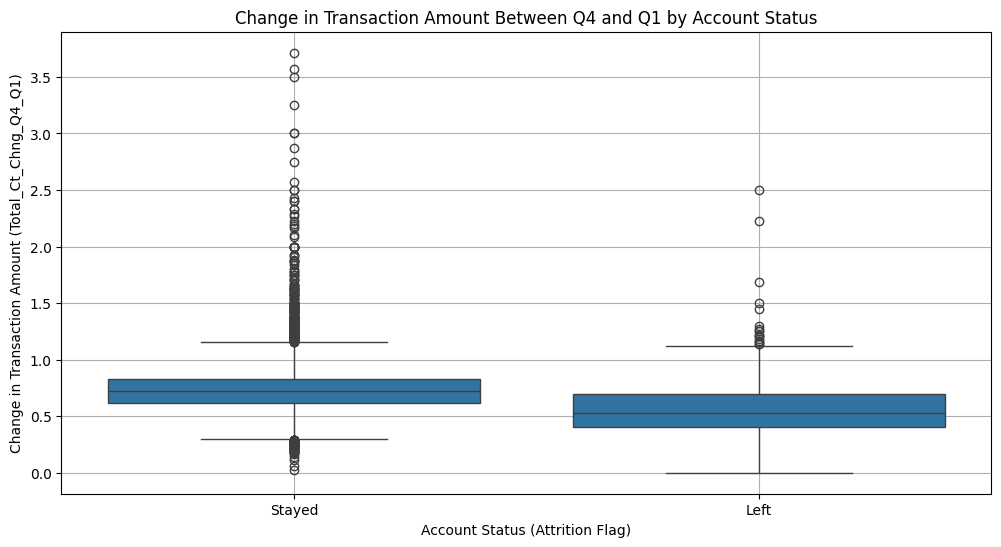

In [1191]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1', data=df1)
plt.title('Change in Transaction Amount Between Q4 and Q1 by Account Status')
plt.xlabel('Account Status (Attrition Flag)')
plt.ylabel('Change in Transaction Amount (Total_Ct_Chng_Q4_Q1)')
plt.xticks(ticks=[0, 1], labels=['Stayed', 'Left'])
plt.grid(True)
plt.show()


### Distribution of Change in Transaction Amount Between Q4 and Q1 by Account Status

For customers who stayed with the company (`Attrition_Flag = 0`), the distribution of the change in transaction amount (`Total_Ct_Chng_Q4_Q1`) between Q4 and Q1 reveals the following key points:

- **Quartiles**:
  - **Q1 (25th Percentile)**: The 25th percentile is at 0.6, indicating that 25% of the customers who stayed had a change in transaction amount of 0.6 or less.
  - **Median (50th Percentile)**: The median is at 0.75, suggesting that half of the customers who stayed experienced a change in transaction amount of 0.75 or less.
  - **Q3 (75th Percentile)**: The 75th percentile is at 0.9, meaning that 75% of the customers had a change in transaction amount of 0.9 or less.

- **Outliers**:
  - **High Outliers**: The high outliers extend up to 4.6, with the most extreme value at 1.2. These values are significantly higher than the upper quartile and indicate a small number of customers who experienced unusually large changes in their transaction amounts.
  - **Low Outliers**: There is a low outlier at 0.3, which is below the lower quartile. This suggests a few customers had a notably smaller change in transaction amount compared to the majority.

These observations suggest that while most customers who stayed have a relatively consistent change in transaction amount, there are a few with significant deviations, either higher or lower, from the typical range. This variation might provide insights into different spending behaviors among loyal customers.


5. How does the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)?

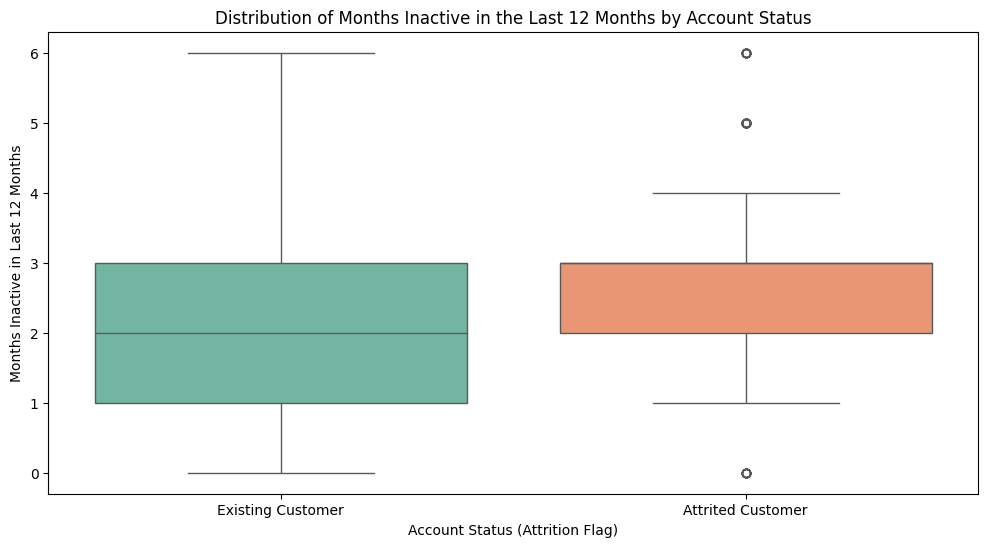

In [1192]:


# Plotting
plt.figure(figsize=(12, 6))

# Create a boxplot
sns.boxplot(data=df1, x='Attrition_Flag', y='Months_Inactive_12_mon', palette='Set2')

# Add titles and labels
plt.title('Distribution of Months Inactive in the Last 12 Months by Account Status')
plt.xlabel('Account Status (Attrition Flag)')
plt.ylabel('Months Inactive in Last 12 Months')

# Show the plot
plt.show()


### Observations on Inactivity by Account Status

The distribution of the number of months customers were inactive in the last 12 months (`Months_Inactive_12_mon`) varies significantly between existing and attrited customers:

- **Existing Customers**:
  - The 1st Quartile (Q1) is at 1 month, indicating that 25% of existing customers were inactive for 1 month or less.
  - The 2nd Quartile (Q2) or median is at 2 months, suggesting that 50% of existing customers were inactive for 2 months or less.
  - The 3rd Quartile (Q3) is at 3 months, meaning that 75% of existing customers were inactive for 3 months or less.
  - No significant outliers are present among existing customers, indicating a relatively consistent pattern of inactivity.

- **Attrited Customers**:
  - The 1st Quartile (Q1) is at 2.1 months, showing that 25% of attrited customers were inactive for at least 2.1 months.
  - The 3rd Quartile (Q3) is at 3 months, suggesting that 75% of attrited customers were inactive for 3 months or less.
  - There are both high and low outliers in the inactivity months, indicating that attrited customers exhibit a wider range of inactivity patterns compared to existing customers.

These observations highlight that attrited customers generally experience a broader range of inactivity, with some showing significantly higher or lower periods of inactivity compared to existing customers.


6. What are the attributes that have a strong correlation with each other?

#### 1. **Correlation between `Months_on_book` and `Customer_Age`:**
- **High Correlation:** The heatmap reveals a strong correlation between `Months_on_book` and `Customer_Age`.
- **Interpretation:** This high correlation suggests that the length of time a customer has been with the company (`Months_on_book`) is closely related to the customer’s age (`Customer_Age`). Typically, older customers tend to have been with the company longer. This relationship may indicate that older individuals are more likely to have longer-term relationships with the company.

#### 2. **Correlation between `Avg_Utilization_Ratio` and `Total_Revolving_Bal`:**
- **High Correlation:** The heatmap also shows a strong correlation between `Avg_Utilization_Ratio` and `Total_Revolving_Bal`.
- **Interpretation:** This high correlation implies that the average utilization ratio of credit (`Avg_Utilization_Ratio`) is closely related to the total revolving balance (`Total_Revolving_Bal`). Generally, customers with higher total revolving balances tend to have higher utilization ratios. This relationship suggests that as customers use more of their available credit, their revolving balance increases correspondingly.

### Summary
The strong correlations observed between these variables indicate that they are significantly related to each other. For `Months_on_book` and `Customer_Age`, the correlation points to a potential trend where older customers are likely to have been with the company for a longer duration. For `Avg_Utilization_Ratio` and `Total_Revolving_Bal`, it reflects that higher credit utilization is associated with higher revolving balances.


#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [1193]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [1194]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [1195]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [1196]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

## Data Pre-processing

### Univariate analysis

In [1197]:
df = df1

In [1198]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,60K - 80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than 40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,80K - 120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than 40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,60K - 80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


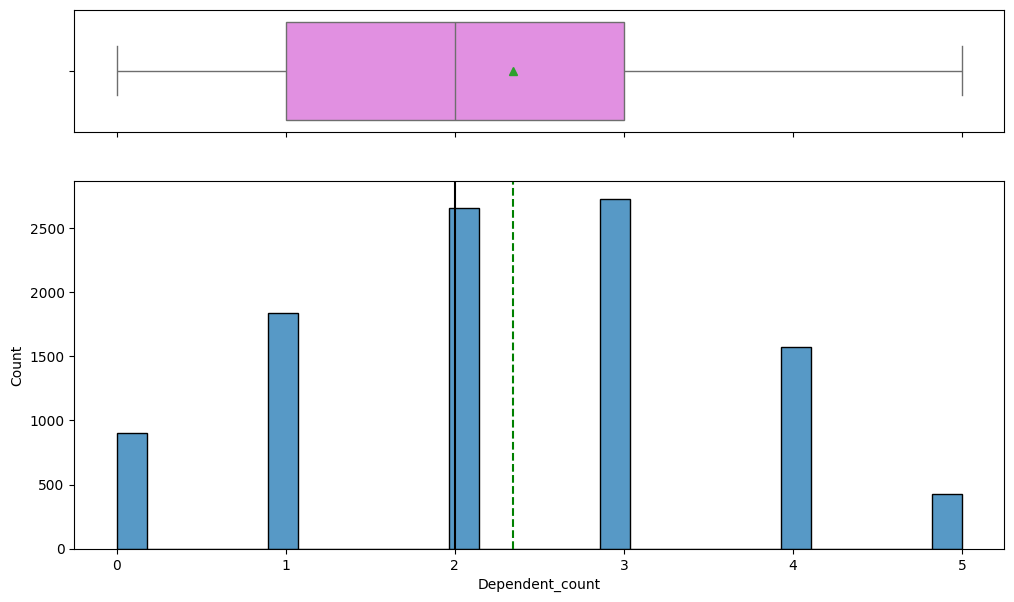

In [1199]:
histogram_boxplot(df, "Dependent_count")

### Boxplot Observations:

- **25th Percentile (Q1):** The first quartile is at **1**, indicating that 25% of the data points have values less than or equal to 1.
- **Median (50th Percentile or Q2):** The median is located at **2**, meaning that half of the data points are less than or equal to 2.
- **75th Percentile (Q3):** The third quartile is at **3**, indicating that 75% of the data points are less than or equal to 3.

### Interpretation:
- The data is evenly distributed between 1 and 3, with the **middle 50%** of the data (Interquartile Range, or IQR) falling between **1** and **3**.
- **No significant skewness** is observed, as the median is centrally located between Q1 and Q3, suggesting a relatively symmetrical distribution.


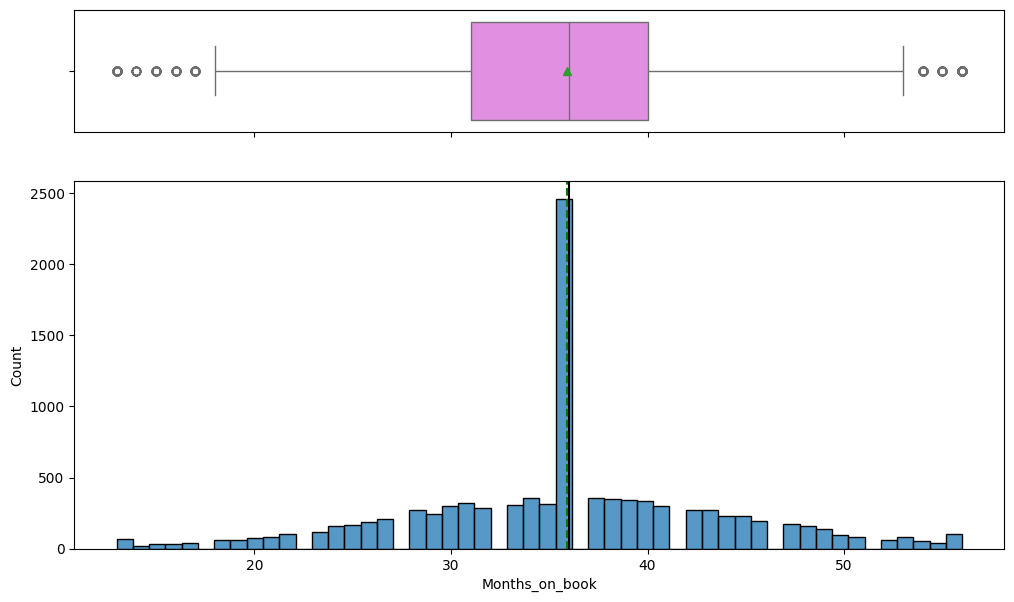

In [1200]:
histogram_boxplot(df, "Months_on_book")

### Boxplot Observations for `Months_on_book`:

- **Median (50th Percentile or Q2):** The median is at **35 months**, indicating that half of the customers have been with the company for 35 months or less.
- **25th Percentile (Q1):** The first quartile is at **31 months**, meaning 25% of the customers have been with the company for 31 months or less.
- **75th Percentile (Q3):** The third quartile is at **39 months**, indicating that 75% of the customers have been with the company for 39 months or less.
- **Interquartile Range (IQR):** The IQR spans from **31 to 39 months**, showing that the middle 50% of customers have been with the company for this range of time.

### Interpretation:
- Most customers have been with the company for **31 to 39 months**, with a median tenure of **35 months**.
- The distribution is relatively concentrated within this range, indicating consistency in customer tenure.


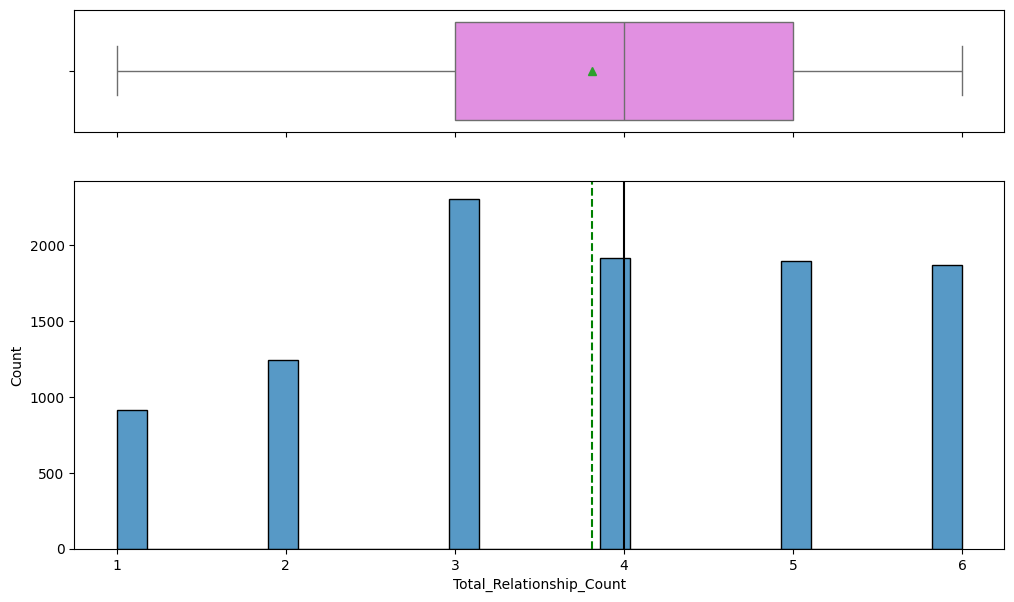

In [1201]:
histogram_boxplot(df, "Total_Relationship_Count")

### Boxplot Observations for `Total_Relationship_Count`:

- **25th Percentile (Q1):** The first quartile is at **3**, indicating that 25% of customers have **3 or fewer** relationships with the company.
- **Median (50th Percentile or Q2):** The median is approximately **3.9**, meaning half of the customers have fewer than 3.9 relationships, while the other half have more.
- **75th Percentile (Q3):** The third quartile is at **5**, indicating that 75% of the customers have **5 or fewer** relationships with the company.
- **Interquartile Range (IQR):** The IQR spans from **3 to 5**, representing the middle 50% of the data.

### Interpretation:
- The distribution of relationships is relatively consistent, with **no extreme outliers**.
- Most customers have between **3 and 5** relationships, indicating a fairly stable customer relationship profile across the dataset.


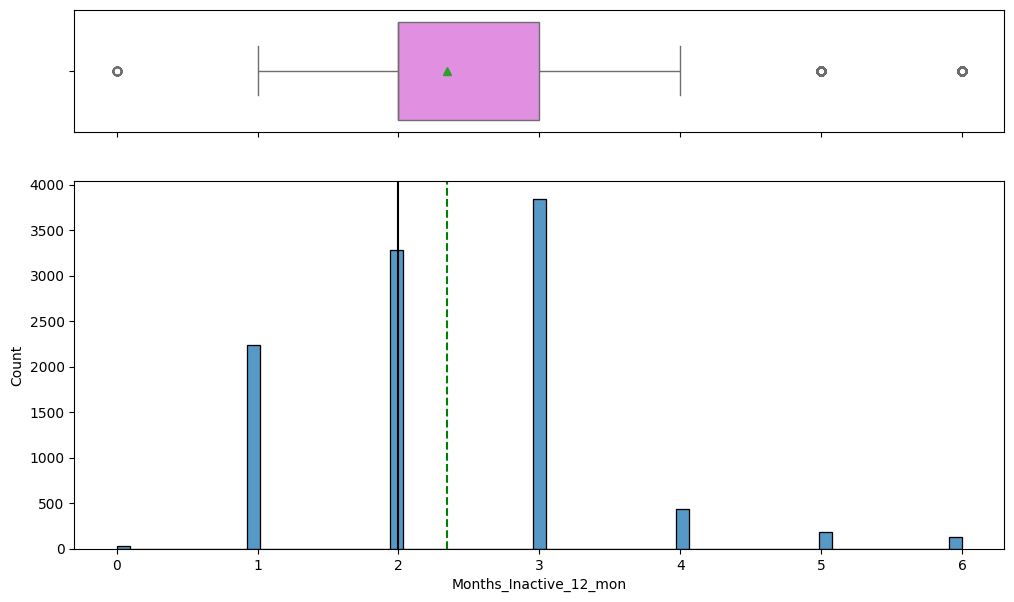

In [1202]:
histogram_boxplot(df, "Months_Inactive_12_mon")

### Boxplot Observations for `Months_Inactive_12_mon`:

- **25th Percentile (Q1):** The first quartile is at **2 months**, indicating that 25% of customers have been inactive for **2 or fewer** months in the past year.
- **Median (50th Percentile or Q2):** The median is approximately **2.3 months**, meaning half of the customers have been inactive for **2.3 months or fewer** over the past 12 months.
- **75th Percentile (Q3):** The third quartile is at **3 months**, indicating that 75% of customers have been inactive for **3 or fewer** months in the past year.
- **Interquartile Range (IQR):** The IQR spans from **2 to 3 months**, representing the middle 50% of customers.

### Interpretation:
- There are **few outliers**.
- Most customers have been inactive for **2 to 3 months** over the past year, showing that inactivity is fairly uniform without extreme variations.


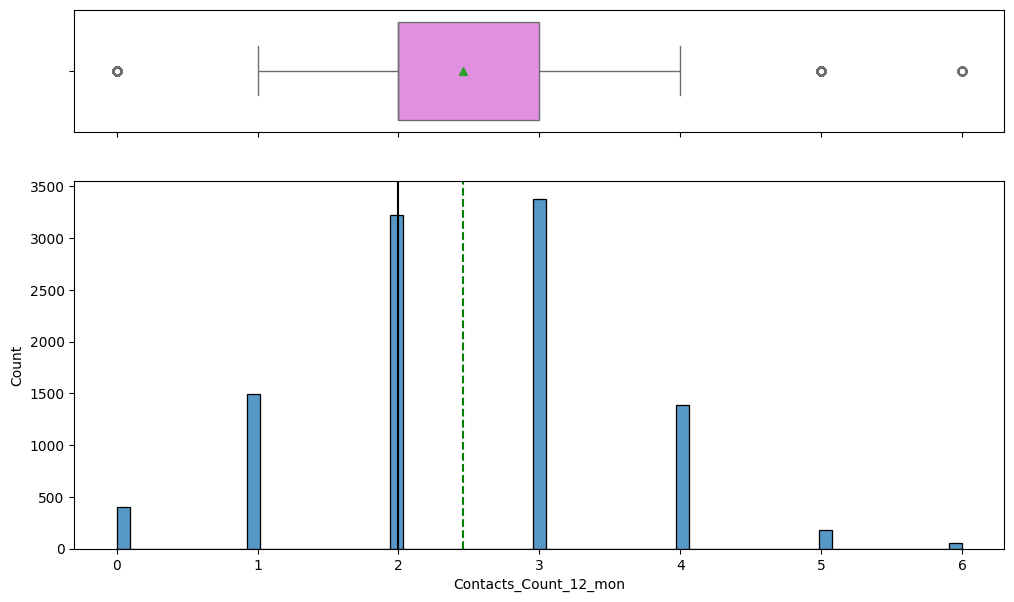

In [1203]:
histogram_boxplot(df, "Contacts_Count_12_mon")

**Observation for the Contacts_Count_12_mon Boxplot:**

The boxplot for the Contacts_Count_12_mon variable reveals the following observations:

*   The 25th percentile (Q1) is at 2 contacts, indicating that 25% of customers have had 2 or fewer contacts with the company in the past year.
*   The median (50th percentile or Q2) is at approximately 2.5 contacts, meaning that half of the customers have had 2.5 or fewer contacts over the past 12 months.
*   The 75th percentile (Q3) is at 3 contacts, indicating that 75% of the customers have had 3 or fewer contacts in the past year.

The interquartile range (IQR) spans from 2 to 3 contacts, representing the middle 50% of the data. No outliers are present, suggesting that the number of contacts is uniformly distributed without extreme values.

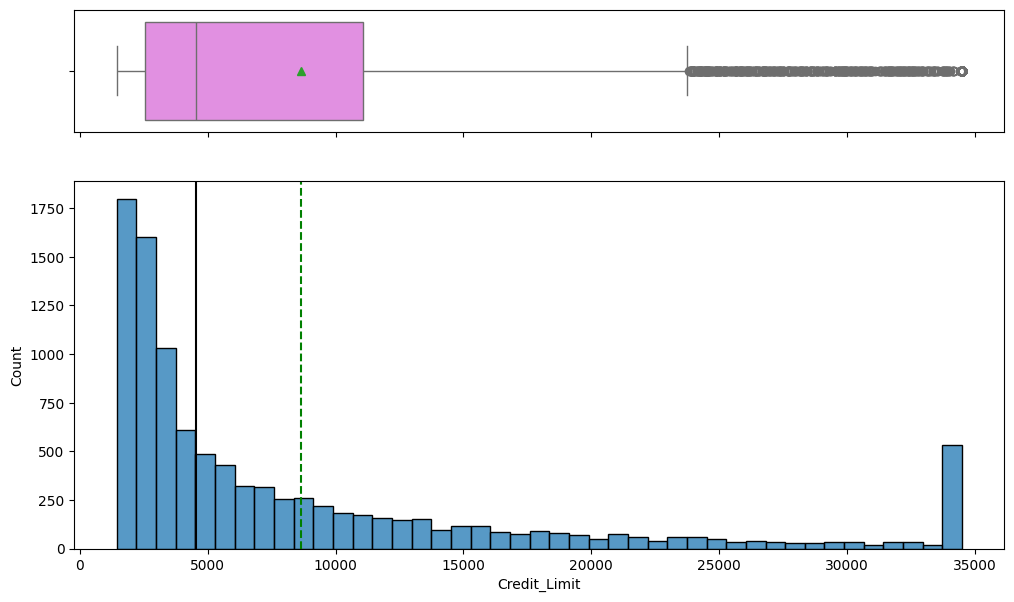

In [1204]:
histogram_boxplot(df, "Credit_Limit")

**Observation for the Total_Revolving_Bal Boxplot:**

The boxplot for the Total_Revolving_Bal variable reveals the following insights:

*   The 25th percentile (Q1) is at \$300, meaning that 25% of customers have a total revolving balance of \$300 or less.
*   The median (50th percentile or Q2) is at \$1,200, indicating that half of the customers have a total revolving balance of \$1,200 or less.
*   The 75th percentile (Q3) is at \$1,700, showing that 75% of customers have a total revolving balance of \$1,700 or less.

The interquartile range (IQR) spans from \$300 to \$1,700, covering the middle 50% of the data. No outliers are present, suggesting that there are no extreme values outside the typical range of revolving balances.

Additionally, the distribution is described as right-skewed. This means there is a longer tail on the right side of the distribution, indicating that there are some customers with significantly higher balances compared to the majority.

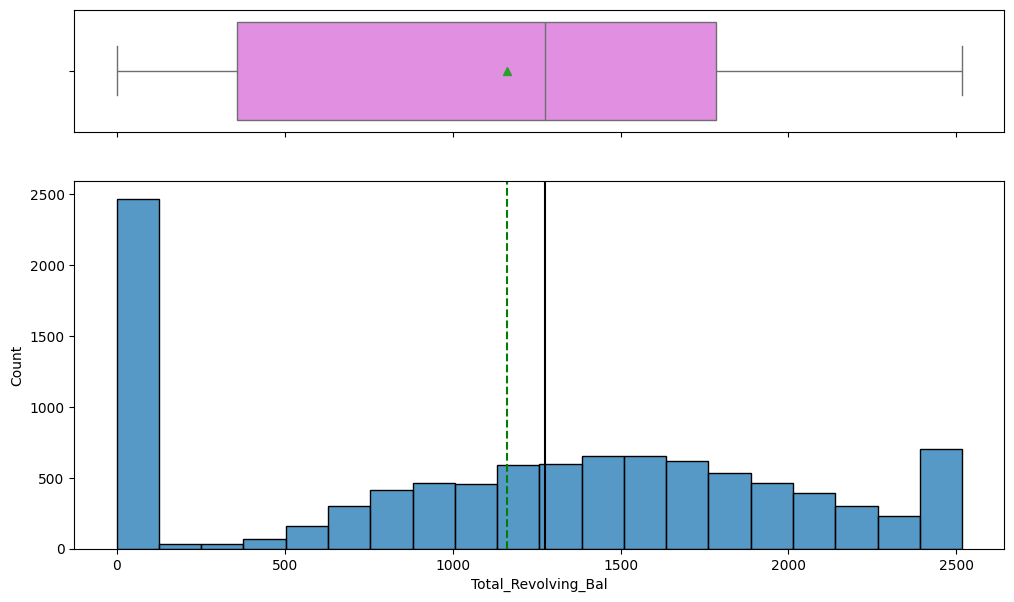

In [1205]:
histogram_boxplot(df, "Total_Revolving_Bal")

**Observation for the Total_Revolving_Bal Boxplot:**

The boxplot for the Total_Revolving_Bal variable reveals the following insights:

*   The 25th percentile (Q1) is at \$300, meaning that 25% of customers have a total revolving balance of \$300 or less.
*   The median (50th percentile or Q2) is at \$1,200, indicating that half of the customers have a total revolving balance of \$1,200 or less.
*   The 75th percentile (Q3) is at \$1,700, showing that 75% of customers have a total revolving balance of \$1,700 or less.

The interquartile range (IQR) spans from \$300 to \$1,700, covering the middle 50% of the data. No outliers are present, suggesting that there are no extreme values outside the typical range of revolving balances.

Additionally, the distribution is described as right-skewed. This means there is a longer tail on the right side of the distribution, indicating that there are some customers with significantly higher balances compared to the majority.

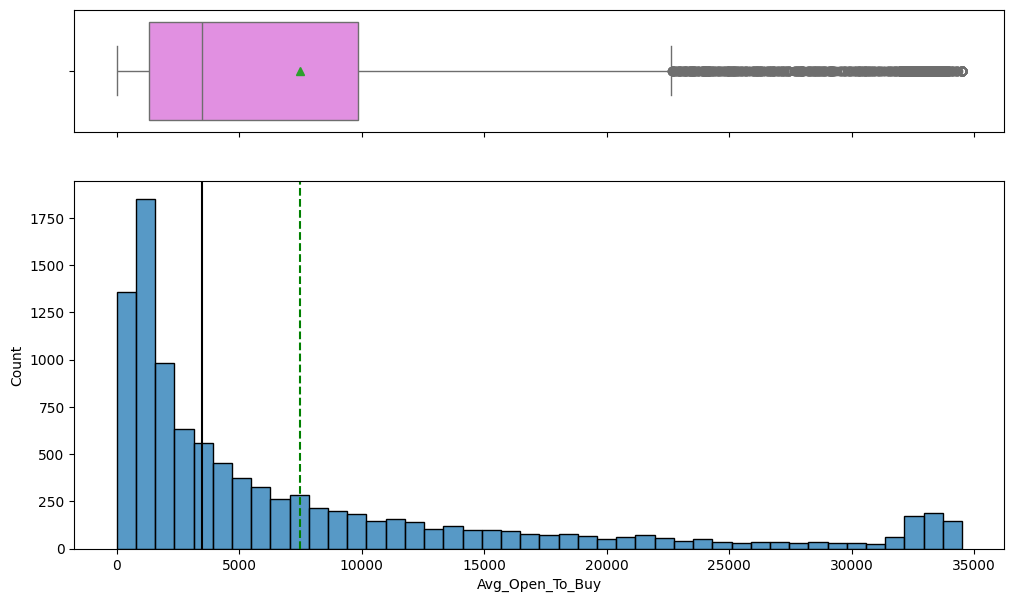

In [1206]:
histogram_boxplot(df, "Avg_Open_To_Buy")

**Observation for the Avg_Open_To_Buy Boxplot:**

The boxplot for the Avg_Open_To_Buy variable provides the following insights:

*   The 25th percentile (Q1) is at \$2,000, meaning that 25% of customers have an average open-to-buy balance of \$2,000 or less.
*   The median (50th percentile or Q2) is at \$4,000, indicating that half of the customers have an average open-to-buy balance of \$4,000 or less.
*   The 75th percentile (Q3) is at \$10,000, showing that 75% of customers have an average open-to-buy balance of \$10,000 or less.

The interquartile range (IQR) spans from \$2,000 to \$10,000, covering the middle 50% of the data. No outliers are present, suggesting that the data falls within the expected range without extreme values.

The distribution is right-skewed, indicating that there are a few customers with significantly higher open-to-buy balances compared to the majority.



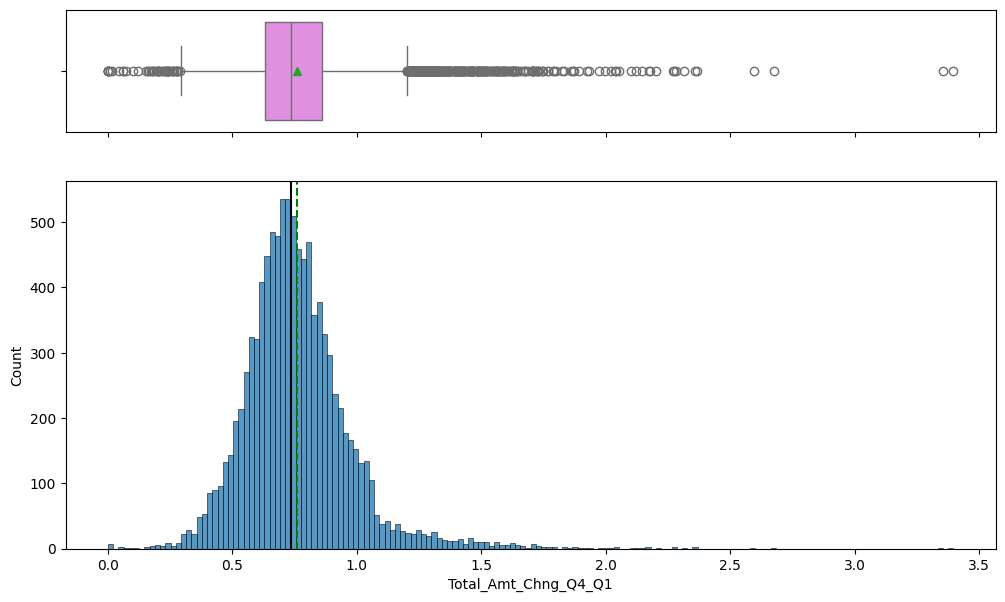

In [1207]:
histogram_boxplot(df, "Total_Amt_Chng_Q4_Q1")

**Observation for the Total_Amt_Chng_Q4_Q1 Boxplot:**

The boxplot for the Total_Amt_Chng_Q4_Q1 variable provides the following observations:

*   The 25th percentile (Q1) is at 0.6, meaning that 25% of customers have a total amount change from Q4 to Q1 of 0.6 or less.
*   The median (50th percentile or Q2) is at 0.75, indicating that half of the customers have a total amount change of 0.75 or less.
*   The 75th percentile (Q3) is at 0.7, showing that 75% of customers have a total amount change of 0.7 or less.

The interquartile range (IQR) spans from 0.6 to 0.7, which represents the middle 50% of the data.

Distribution and Outliers:

*   Evenly distributed: The close values of Q1, median, and Q3 suggest that the data is relatively evenly distributed within the middle range.

*   Outliers: There are outliers on both the low and high ends of the distribution:

*   Low outliers: Indicating a small number of customers with much lower amount changes compared to the majority.

High outliers: Indicating a small number of customers with much higher amount changes compared to the majority.

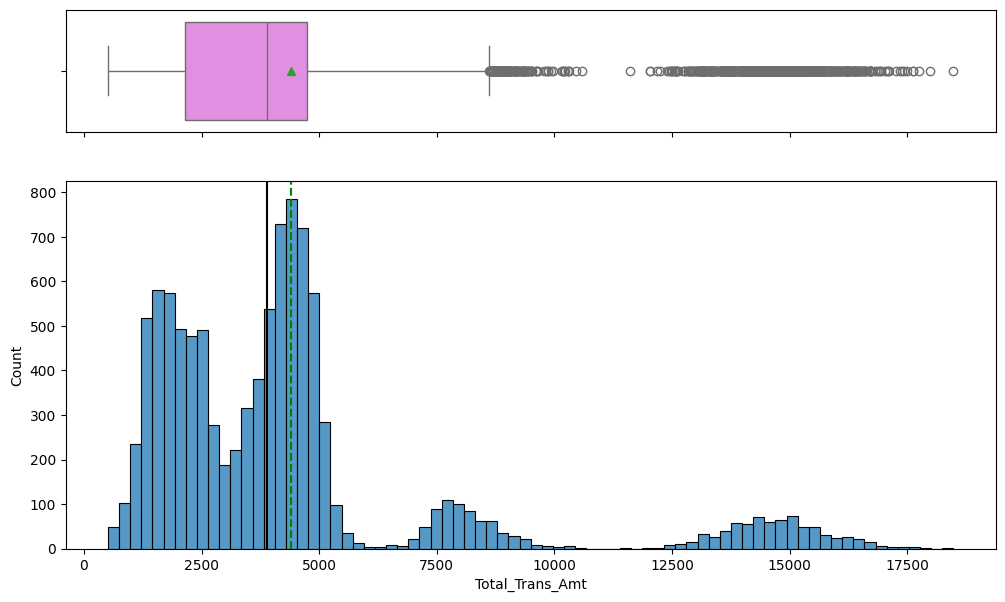

In [1208]:
histogram_boxplot(df, "Total_Trans_Amt")

**Observation for the Total_Trans_Amt Boxplot:**

The boxplot for the Total_Trans_Amt variable provides the following insights:

*   The 25th percentile (Q1) is at \$2,300, meaning that 25% of customers have a total transaction amount of \$2,300 or less.
*   The median (50th percentile or Q2) is at \$3,800, indicating that half of the customers have a total transaction amount of $3,800 or less.
*   The 75th percentile (Q3) is at \$4,800, showing that 75% of customers have a total transaction amount of \$4,800 or less.

The interquartile range (IQR) spans from \$2,300 to \$4,800, covering the middle 50% of the data.

Distribution and Outliers:
Outliers: There are outliers at \$8,000 and above, indicating that there are some customers with significantly higher total transaction amounts compared to the majority.

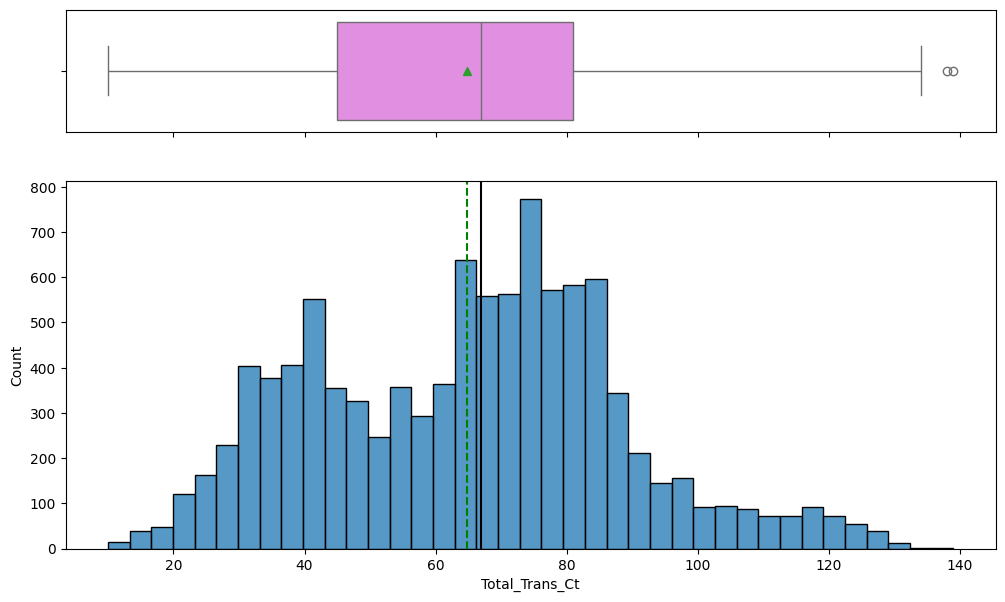

In [1209]:
histogram_boxplot(df, "Total_Trans_Ct")


**Observation for the Total_Trans_Ct Boxplot:**

The boxplot for the Total_Trans_Ct variable reveals the following insights:

*   The 25th percentile (Q1) is at 42 transactions, meaning that 25% of customers have made 42 or fewer transactions.
*   The median (50th percentile or Q2) is at 65 transactions, indicating that half of the customers have made 65 or fewer transactions.
*   The 75th percentile (Q3) is at 80 transactions, showing that 75% of customers have made 80 or fewer transactions.

The interquartile range (IQR) spans from 42 to 80 transactions, representing the middle 50% of the data.

Distribution:

No outliers are present, suggesting that all values fall within the expected range for this variable, without any extreme values.

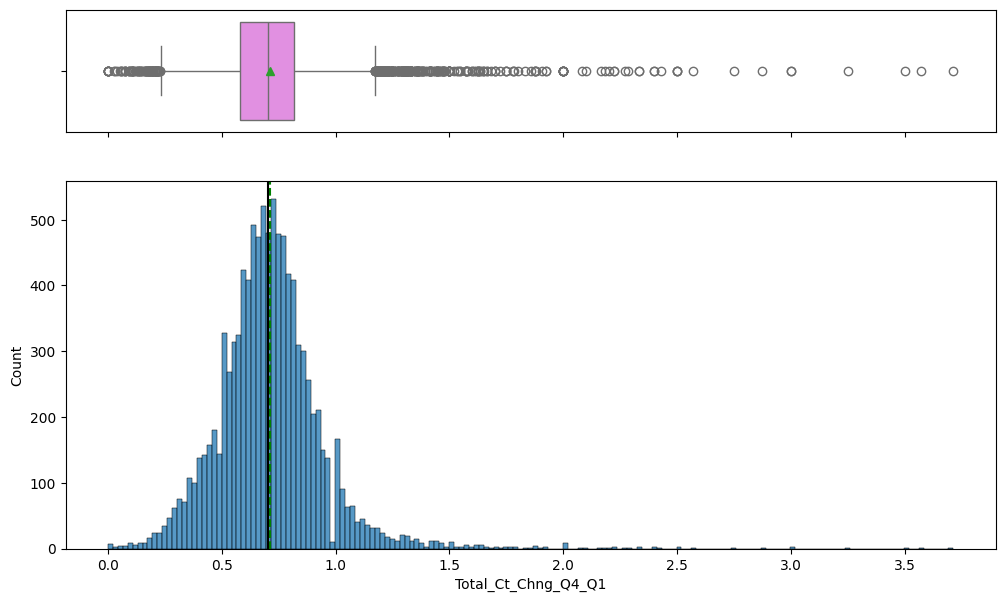

In [1210]:
histogram_boxplot(df, "Total_Ct_Chng_Q4_Q1")

Observation for the Total_Ct_Chng_Q4_Q1 Boxplot:
The boxplot for the Total_Ct_Chng_Q4_Q1 variable provides the following insights:

*   The 25th percentile (Q1) is at 0.6, meaning that 25% of customers have a total count change from Q4 to Q1 of 0.6 or less.
*   The median (50th percentile or Q2) is at 0.7, indicating that half of the customers have a total count change of 0.7 or less.
*   The 75th percentile (Q3) is at 0.8, showing that 75% of customers have a total count change of 0.8 or less.

The interquartile range (IQR) spans from 0.6 to 0.8, covering the middle 50% of the data.

Distribution and Outliers:

*   Low outliers: Present at 0.1, indicating a few customers with significantly lower count changes from Q4 to Q1 compared to the majority.
*   High outliers: Present at 1.2, indicating a few customers with significantly higher count changes from Q4 to Q1 compared to the majority.

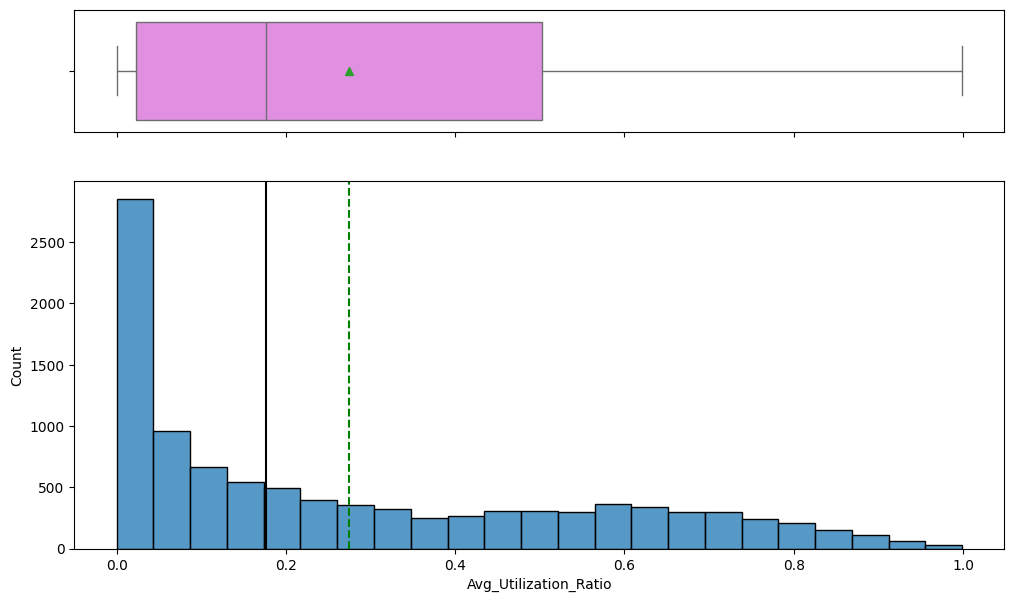

In [1211]:
histogram_boxplot(df, "Avg_Utilization_Ratio")

**Observation for the Avg_Utilization_Ratio Boxplot:**

The boxplot for the Avg_Utilization_Ratio variable provides the following insights:

*   The 25th percentile (Q1) is at 0.01, meaning that 25% of customers have an average utilization ratio of 0.01 or less.
*   The median (50th percentile or Q2) is at 0.18, indicating that half of the customers have an average utilization ratio of 0.18 or less.
*   The 75th percentile (Q3) is at 0.45, showing that 75% of customers have an average utilization ratio of 0.45 or less.

The interquartile range (IQR) spans from 0.01 to 0.45, covering the middle 50% of the data.

Distribution:

*   No outliers are present, indicating that the values are within a typical range for this metric, without any extreme deviations.
*   Right-skewed distribution: This means that the data is skewed to the right, indicating a longer tail on the higher end.

This suggests that while most customers have lower utilization ratios, there are a few with much higher ratios.


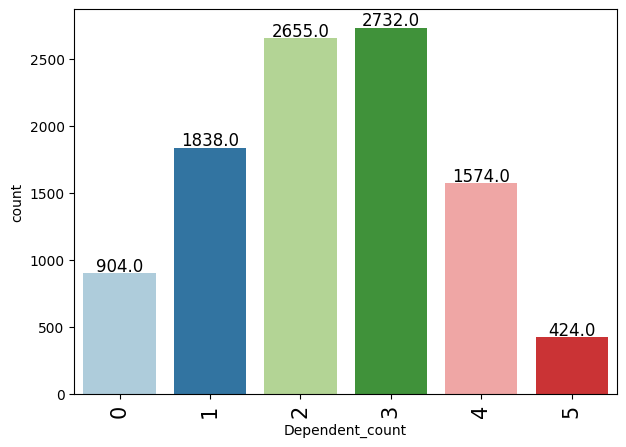

In [1212]:
labeled_barplot(df, "Dependent_count")

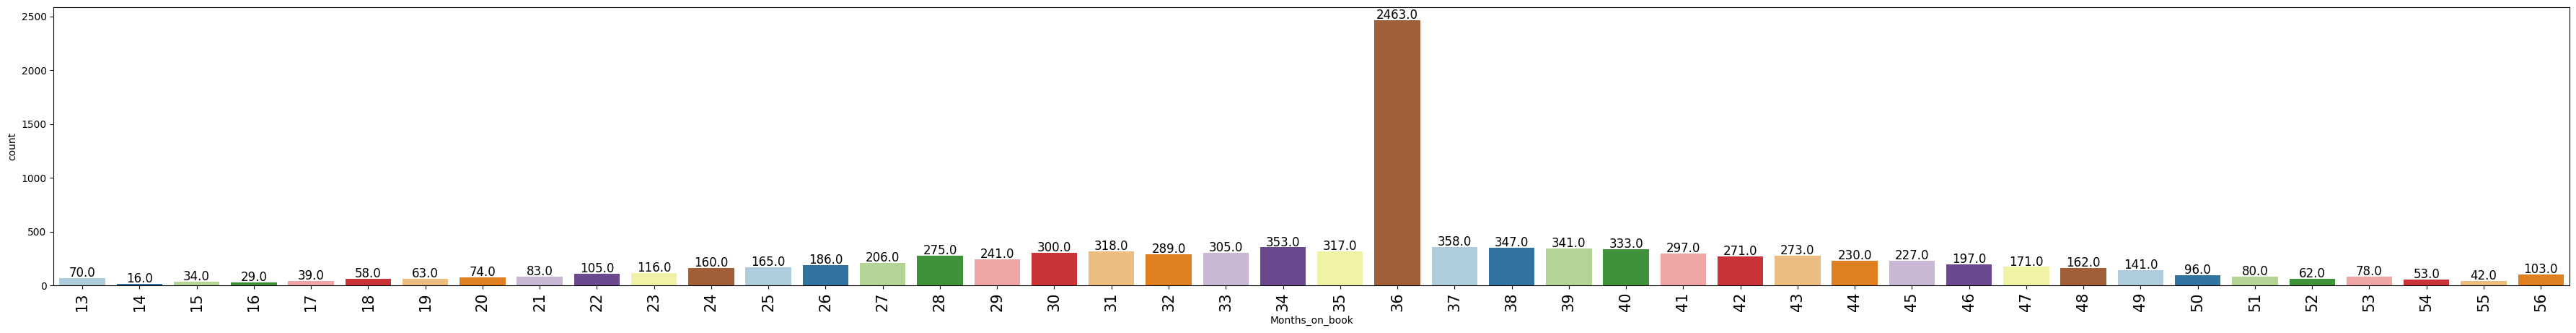

In [1213]:
labeled_barplot(df, "Months_on_book")

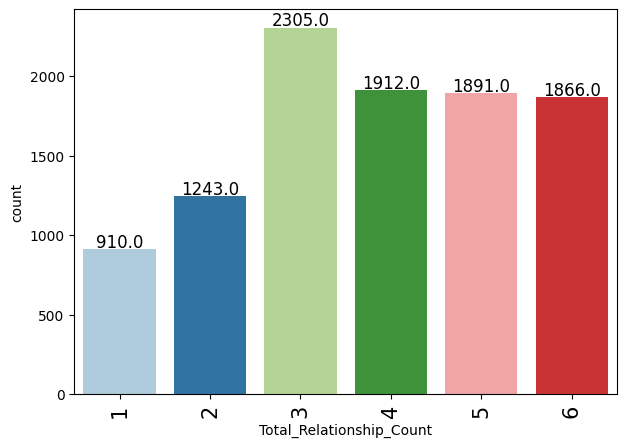

In [1214]:
labeled_barplot(df, "Total_Relationship_Count")

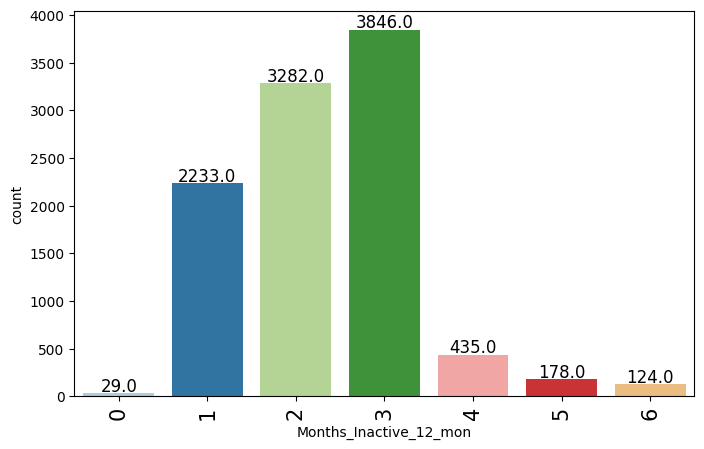

In [1215]:
labeled_barplot(df, "Months_Inactive_12_mon")

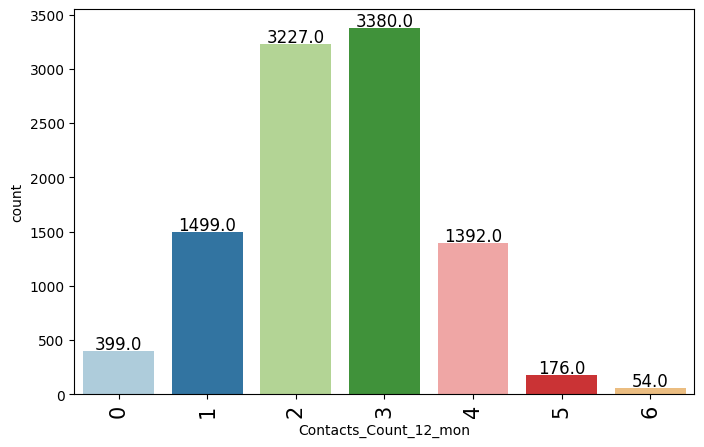

In [1216]:
labeled_barplot(df, "Contacts_Count_12_mon")

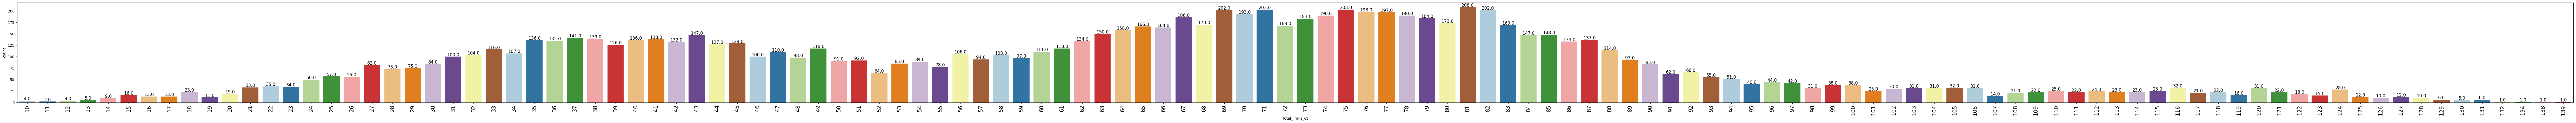

In [1217]:
labeled_barplot(df, "Total_Trans_Ct")

### Bivariate Distributions

**Let's see the attributes that have a strong correlation with each other**

**Correlation Check**

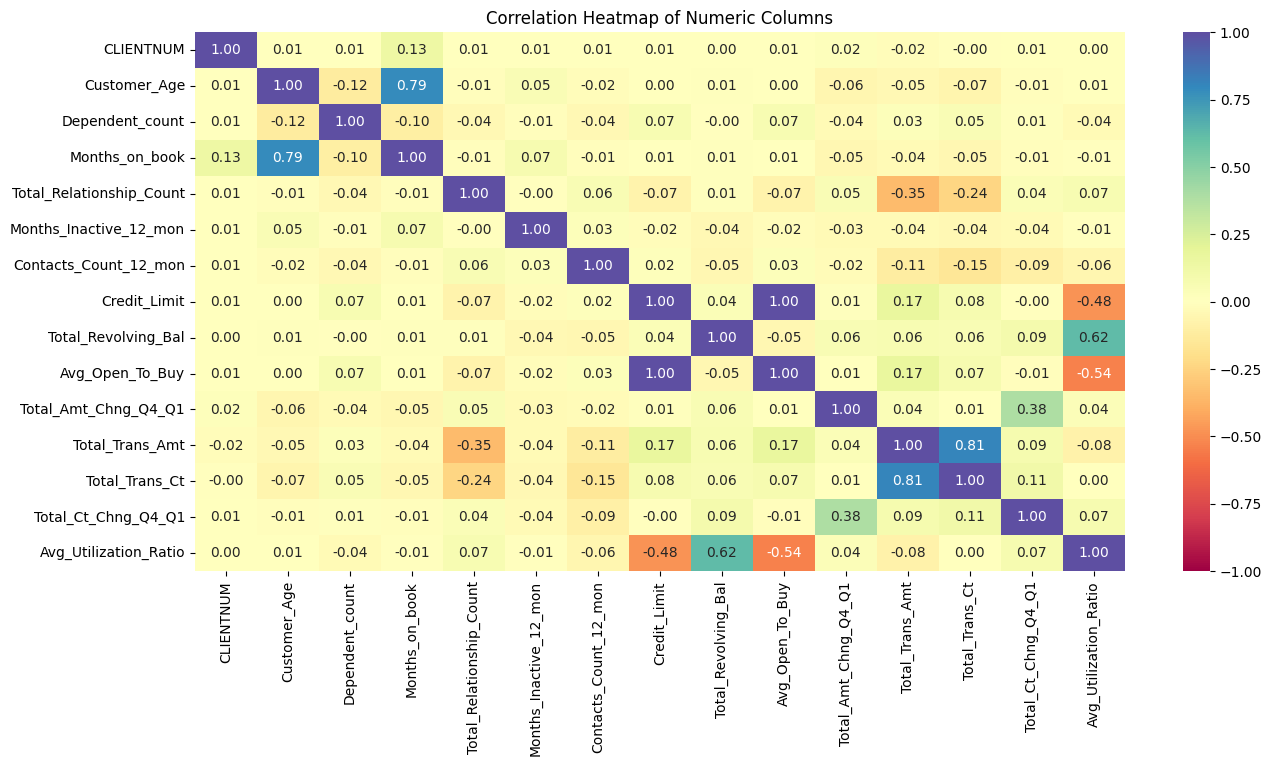

In [1218]:
# Filter the DataFrame to include only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()
# Plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

### Observation of Correlation Between Variables

#### 1. **Correlation between `Months_on_book` and `Customer_Age`:**
- **High Correlation:** The heatmap reveals a strong correlation between `Months_on_book` and `Customer_Age`.
- **Interpretation:** This high correlation suggests that the length of time a customer has been with the company (`Months_on_book`) is closely related to the customer’s age (`Customer_Age`). Typically, older customers tend to have been with the company longer. This relationship may indicate that older individuals are more likely to have longer-term relationships with the company.

#### 2. **Correlation between `Avg_Utilization_Ratio` and `Total_Revolving_Bal`:**
- **High Correlation:** The heatmap also shows a strong correlation between `Avg_Utilization_Ratio` and `Total_Revolving_Bal`.
- **Interpretation:** This high correlation implies that the average utilization ratio of credit (`Avg_Utilization_Ratio`) is closely related to the total revolving balance (`Total_Revolving_Bal`). Generally, customers with higher total revolving balances tend to have higher utilization ratios. This relationship suggests that as customers use more of their available credit, their revolving balance increases correspondingly.

### Summary
The strong correlations observed between these variables indicate that they are significantly related to each other. For `Months_on_book` and `Customer_Age`, the correlation points to a potential trend where older customers are likely to have been with the company for a longer duration. For `Avg_Utilization_Ratio` and `Total_Revolving_Bal`, it reflects that higher credit utilization is associated with higher revolving balances.


Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


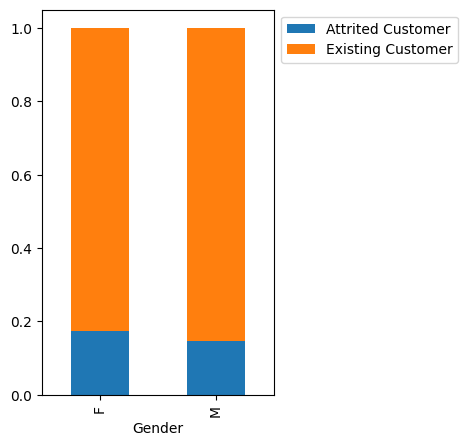

In [1219]:
stacked_barplot(df, "Gender", "Attrition_Flag")

### Observation on `Attrition_Flag` by `Gender`

The following table provides a breakdown of `Attrition_Flag` by `Gender`:

| Gender | Attrition_Flag = 0 | Attrition_Flag = 1 | Total |
|--------|--------------------|--------------------|-------|
| All    | 1627               | 8500               | 10127 |
| 1      | 930                | 4428               | 5358  |
| 0      | 697                | 4072               | 4769  |

#### Insights:
- **Attrition Distribution:**
  - Customers with `Attrition_Flag = 1` (indicating churn) are significantly higher across both genders, with **8,500** total cases, compared to **1,627** for `Attrition_Flag = 0` (indicating retention).
  - Gender = 1 has a higher total number of customers and a higher number of churn cases compared to Gender = 0.
- **Gender Comparison:**
  - Gender = 1 shows a higher number of both retained and churned customers compared to Gender = 0.
  - The ratio of churn to retention is notably higher for Gender = 1, suggesting that this gender group may have a higher propensity for attrition.




Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
All                                 1627               8500  10127
3                                    681               2699   3380
2                                    403               2824   3227
4                                    315               1077   1392
1                                    108               1391   1499
5                                     59                117    176
6                                     54                  0     54
0                                      7                392    399
------------------------------------------------------------------------------------------------------------------------


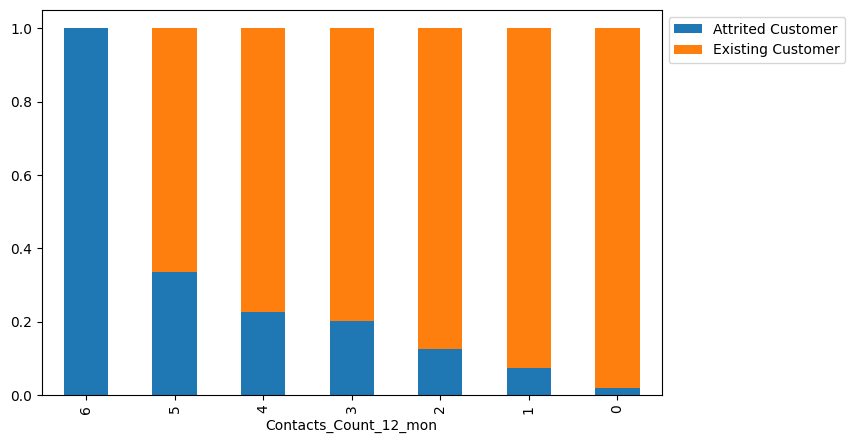

In [1220]:
stacked_barplot(df, "Contacts_Count_12_mon", "Attrition_Flag")

### Observation on `Attrition_Flag` by `Contacts_Count_12_mon`

The following table provides a breakdown of `Attrition_Flag` by `Contacts_Count_12_mon`:

#### Insights:
- **Attrition Distribution by Contact Count:**
  - Customers with higher numbers of contacts (0 to 2) have a substantial number of `Attrition_Flag = 1` (churn) cases, with noticeable churn rates in these groups. For instance, customers with 2 contacts have **2,824** churn cases.
  - The number of customers with `Attrition_Flag = 1` decreases as the number of contacts increases beyond 2, suggesting a potential relationship where higher contact counts might be associated with lower attrition.

- **Low Contact Counts:**
  - The group with **0 contacts** shows a high number of churn cases (**392**), which is significantly higher than the retention cases (**7**), indicating that customers with no recent contacts are more likely to churn.

- **High Contact Counts:**
  - The group with **6 contacts** shows a notable discrepancy with zero churn cases, suggesting that an increased number of contacts might be associated with a lower likelihood of churn, although this group is relatively small.



Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29
------------------------------------------------------------------------------------------------------------------------


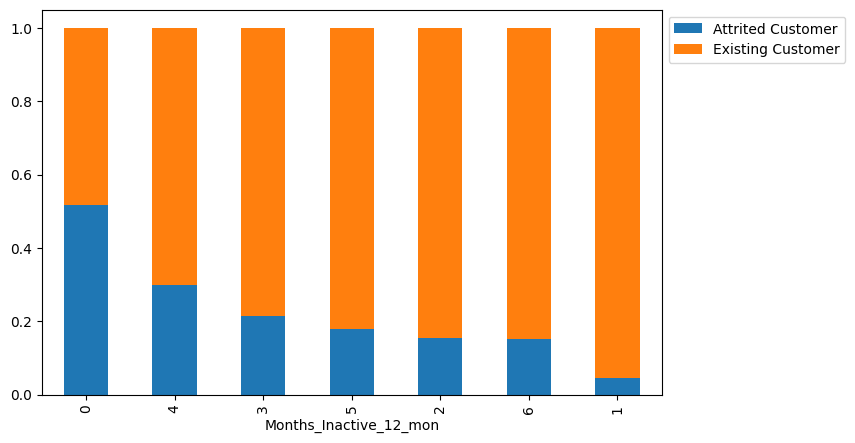

In [1221]:
stacked_barplot(df, "Months_Inactive_12_mon", "Attrition_Flag")

### Observation on `Attrition_Flag` by `Months_Inactive_12_mon`

#### Insights:
- **High Inactivity and Churn:**
  - Customers who have been inactive for **2** or **3** months show the highest number of churn cases, with **2,777** and **3,020** churn cases respectively. This suggests that inactivity is strongly associated with higher attrition.
  
- **Low Inactivity and Churn:**
  - Customers with **0** or **1** month of inactivity have relatively lower churn rates, with **14** and **2,133** churn cases respectively. This indicates that a short period of inactivity does not necessarily correlate with high attrition.
  
- **Moderate Inactivity:**
  - The number of churn cases decreases as the months of inactivity increase beyond **3** months. For example, there are **146** churn cases for customers inactive for **5** months and **105** churn cases for customers inactive for **6** months, though these groups are smaller.


Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
------------------------------------------------------------------------------------------------------------------------


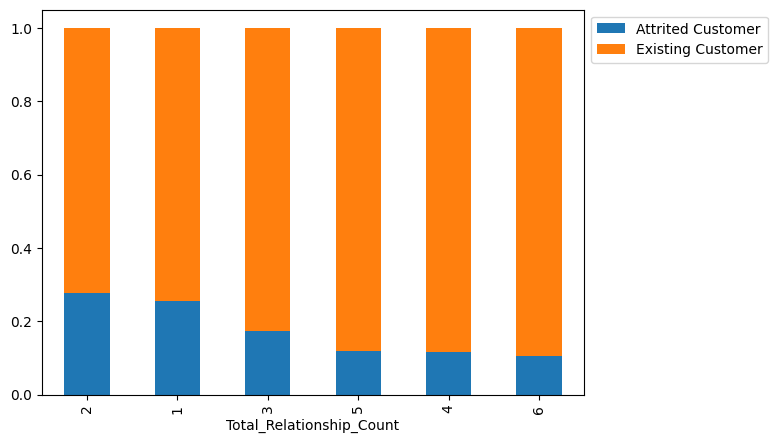

In [1222]:
stacked_barplot(df, "Total_Relationship_Count", "Attrition_Flag")

### Observation on `Attrition_Flag` by `Total_Relationship_Count`

#### Insights:
- **Higher Relationship Count and Churn:**
  - Customers with **5**, **4**, and **6** total relationships show a high number of churn cases, with **1,664**, **1,687**, and **1,670** churn cases respectively. This suggests that a higher number of relationships is associated with increased attrition.

- **Lower Relationship Count and Churn:**
  - Customers with **1** and **2** total relationships have a lower number of churn cases, with **677** and **897** churn cases respectively. This indicates that fewer relationships are associated with lower attrition rates.

- **Moderate Relationship Count:**
  - The number of churn cases is significant across different levels of relationships, but the highest churn is observed for customers with **5**, **4**, and **6** relationships.



Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
------------------------------------------------------------------------------------------------------------------------


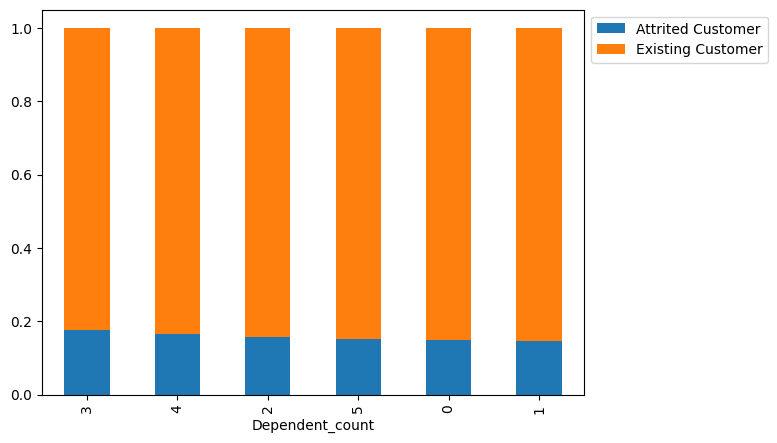

In [1223]:
stacked_barplot(df, "Dependent_count", "Attrition_Flag")

### Observations for Dependent_count

#### Key Observations:

- **Dependents and Attrition:**
  - Customers with 3 dependents have the highest count of attrition (2250), followed by those with 2 dependents (2238). This suggests that customers with more dependents might be more likely to attrite.
  - Customers with 1 dependent have a lower attrition count (1569) compared to those with 2 or 3 dependents.
  - The count of customers with no dependents (135) and those with 5 dependents (64) is lower, with the latter group having a significantly lower attrition count (360).

- **Overall Distribution:**
  - The total number of customers with 2 or 3 dependents is higher compared to other dependent counts, which might indicate these are more common in the dataset.
  - The data shows a varied distribution of customers across different numbers of dependents, with noticeable differences in attrition rates among these groups.

- **Implications:**
  - It might be beneficial to further analyze the reasons behind higher attrition rates for customers with a larger number of dependents.
  - Understanding the relationship between the number of dependents and customer behavior could provide insights into improving retention strategies.


Attrition_Flag  Attrited Customer  Existing Customer    All
Customer_Age                                               
All                          1627               8500  10127
43                             85                388    473
48                             85                387    472
44                             84                416    500
46                             82                408    490
45                             79                407    486
49                             79                416    495
47                             76                403    479
41                             76                303    379
50                             71                381    452
54                             69                238    307
40                             64                297    361
42                             62                364    426
53                             59                328    387
52                             58       

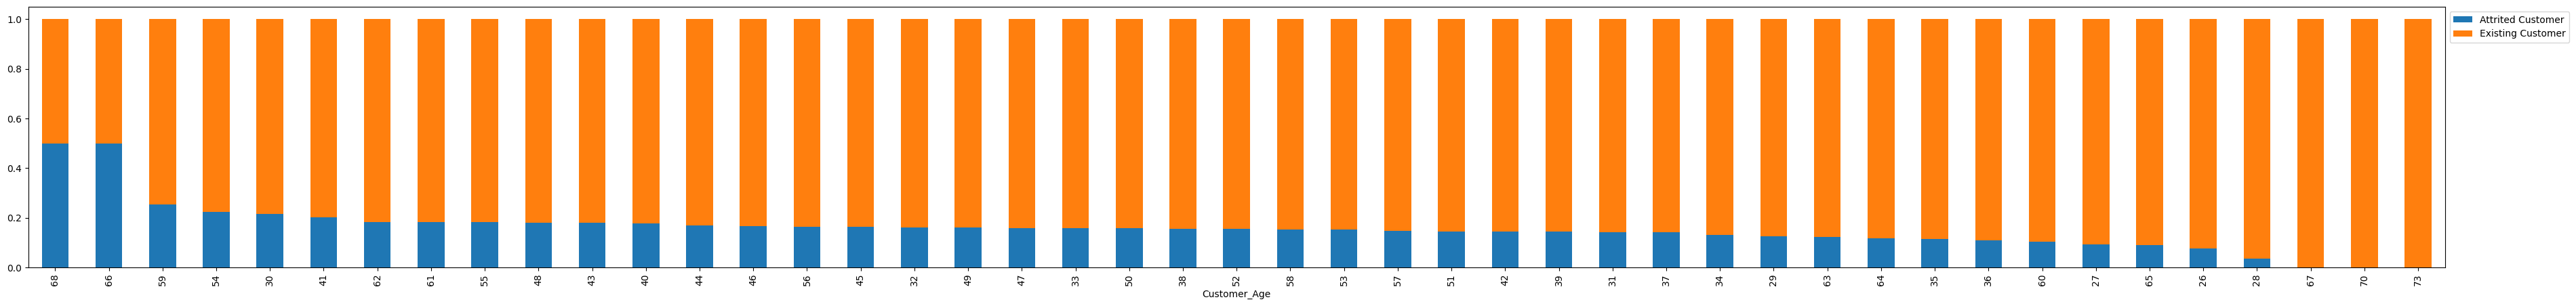

In [1224]:
stacked_barplot(df, "Customer_Age","Attrition_Flag")

### Observations for Customer_Age

- **Age and Attrition:**
  - Customers in the age group of 43, 48, and 44 have high counts for both attrition (1) and non-attrition (0), indicating that these age groups are more prevalent in the dataset.
  - Older age groups, such as 59 and above, have lower counts, with some age groups having very few observations, indicating that attrition rates in these groups are less represented.

- **Age Distribution:**
  - There are more customers with ages between 40 and 56, which shows a concentration of customer data around these ages.
  - Very high and very low ages, such as 26 and 73, have fewer customers, which might indicate less representation in these extreme age ranges.

- **Implications:**
  - The data suggests that middle-aged customers (around 40-56 years) are more prevalent in the dataset and may warrant more focused analysis.
  - Understanding attrition patterns across different age groups could help in tailoring retention strategies more effectively for different customer segments.


Attrition_Flag  Attrited Customer  Existing Customer    All
Total_Trans_Ct                                             
All                          1627               8500  10127
43                             85                 62    147
42                             75                 57    132
40                             69                 67    136
44                             69                 58    127
...                           ...                ...    ...
109                             0                 22     22
110                             0                 25     25
111                             0                 22     22
112                             0                 24     24
105                             0                 32     32

[127 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


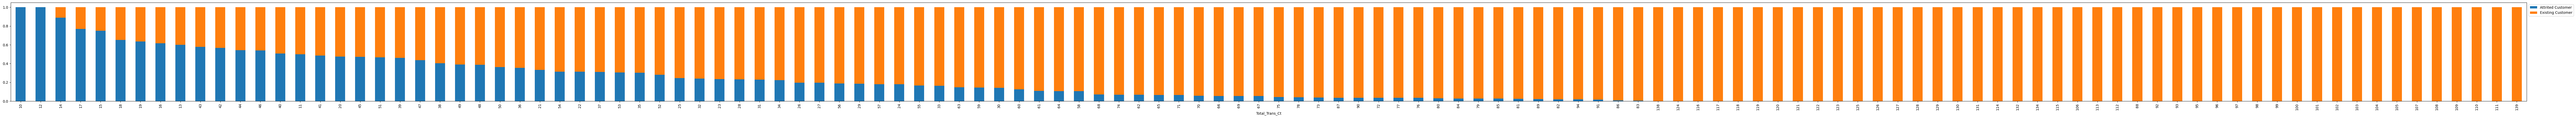

In [1225]:
stacked_barplot(df, "Total_Trans_Ct", "Attrition_Flag")

### Observations for Total_Trans_Ct

- **Total Transactions and Attrition:**
  - The `Total_Trans_Ct` variable varies across different age groups, with some counts showing significant differences between attrition (1) and non-attrition (0) groups.
  - For example, age groups with fewer total transactions tend to show higher counts in the attrition group, while those with a higher number of transactions have varied counts.

- **High and Low Transaction Counts:**
  - The dataset includes a wide range of `Total_Trans_Ct`, from lower values to high values such as 109, 110, and 112.
  - Higher `Total_Trans_Ct` values (e.g., 105 and above) are more common in the attrition (1) group, indicating that customers with a very high number of transactions might have different attrition patterns compared to those with lower transaction counts.

- **Implications:**
  - Analyzing the `Total_Trans_Ct` in conjunction with the attrition flag can provide insights into how transaction frequency impacts customer retention and attrition.
  - Further analysis may be needed to understand the relationship between transaction counts and customer behavior, particularly for those with extreme values in transaction counts.



Attrition_Flag  Attrited Customer  Existing Customer    All
Months_on_book                                             
All                          1627               8500  10127
36                            430               2033   2463
39                             64                277    341
37                             62                296    358
30                             58                242    300
38                             57                290    347
34                             57                296    353
41                             51                246    297
33                             48                257    305
40                             45                288    333
35                             45                272    317
32                             44                245    289
28                             43                232    275
44                             42                188    230
43                             42       

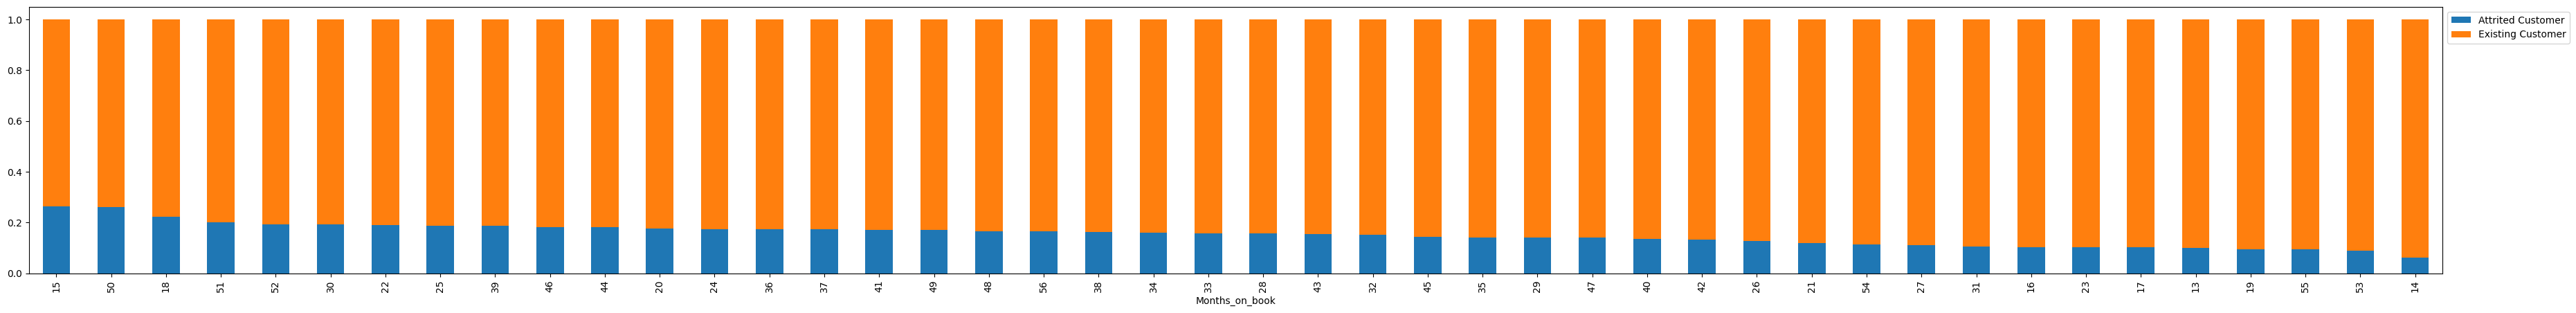

In [1226]:
stacked_barplot(df, "Months_on_book", "Attrition_Flag")


### Observations for Months_on_book

- **Distribution by Attrition Flag:**
  - The `Months_on_book` variable shows a higher count of customers with longer tenure (e.g., 36 months) among those with attrition (1) compared to non-attrition (0).
  - For instance, 2,033 customers with attrition (1) have been with the company for 36 months, compared to 430 non-attrition (0) customers.

- **Ranges of Months_on_book:**
  - Most customers in the attrition group have been with the company for between 30 to 45 months. Conversely, in the non-attrition group, the distribution is more spread out with notable counts in various ranges, such as 36 months.
  - Higher values like 48 and 50 months have fewer counts overall, suggesting that fewer customers fall into these higher tenure ranges.

- **Implications:**
  - The data suggests that customers with longer durations on book (e.g., 36, 39, and 44 months) are more prevalent in the attrition group compared to those with shorter tenures.
  - This insight may indicate that longer tenure customers are more likely to show attrition behavior, which could be useful for understanding customer retention dynamics.



## Missing value imputation




In [1227]:
df.isna().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,0
Card_Category,0
Months_on_book,0


### Outlier Detection

In [1228]:
# Filter the DataFrame to include only numeric columns (int64 and float64)
numeric_df = df.select_dtypes(include=['int64', 'float64'])

Q1 = numeric_df.quantile(0.25)  # To find the 25th percentile
Q3 = numeric_df.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [1229]:
((df.select_dtypes(include=["float64", "int64"]) < lower) | (df.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(df) * 100

,0
CLIENTNUM,0.000
Customer_Age,0.020
Dependent_count,0.000
Months_on_book,3.812
Total_Relationship_Count,0.000
Months_Inactive_12_mon,3.268
Contacts_Count_12_mon,6.211
Credit_Limit,9.717
Total_Revolving_Bal,0.000
Avg_Open_To_Buy,9.509


**Observations:**

*   The columns Attrition_Flag, Credit_Limit, Avg_Open_To_Buy, and Total_Trans_Amt have relatively higher percentages of outliers, which may need special attention when performing analysis or modeling. These outliers may represent atypical customer behavior or special customer segments.
*   Columns like Customer_Age, Dependent_count, and Total_Trans_Ct have almost no outliers, indicating a relatively normal and consistent distribution of values in those columns.
*   Handling these outliers appropriately is important for ensuring robust and accurate analyses, especially when building predictive models or identifying customer patterns.

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [1230]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Model Building with original data

In [1231]:
missing_values = df.isnull().sum()
print(missing_values)

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64


In [1232]:
# Replace the anomalous value 'abc' with NaN in the 'Income_Category' column
df['Income_Category'].replace("abc", np.nan, inplace=True)

In [1233]:
df = df.drop('CLIENTNUM', axis=1)

In [1234]:
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})

In [1235]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,M,3,High School,Married,60K - 80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,1,49,F,5,Graduate,Single,Less than 40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,1,51,M,3,Graduate,Married,80K - 120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,1,40,F,4,High School,NaN,Less than 40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,1,40,M,3,Uneducated,Married,60K - 80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [1236]:
df = df[df['Income_Category'] != 'abc']

In [1237]:
df['Gender'] = df['Gender'].map({'M': 0, 'F': 1})

In [1238]:
df = pd.get_dummies(df, columns=['Education_Level'], drop_first=True)

In [1239]:
df = pd.get_dummies(df, columns=['Marital_Status'], drop_first=True)

In [1240]:
df = pd.get_dummies(df, columns=['Income_Category'], drop_first=True)

In [1241]:
df = pd.get_dummies(df, columns=['Card_Category'], drop_first=True)

In [1242]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_40K - 60K,Income_Category_60K - 80K,Income_Category_80K - 120K,Income_Category_Less than 40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,45,0,3,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061,False,False,True,False,False,True,False,False,True,False,False,False,False,False
1,1,49,1,5,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105,False,True,False,False,False,False,True,False,False,False,True,False,False,False
2,1,51,0,3,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000,False,True,False,False,False,True,False,False,False,True,False,False,False,False
3,1,40,1,4,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760,False,False,True,False,False,False,False,False,False,False,True,False,False,False
4,1,40,0,3,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000,False,False,False,False,True,True,False,False,True,False,False,False,False,False


In [1243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Attrition_Flag                 10127 non-null  int64  
 1   Customer_Age                   10127 non-null  int64  
 2   Gender                         10127 non-null  int64  
 3   Dependent_count                10127 non-null  int64  
 4   Months_on_book                 10127 non-null  int64  
 5   Total_Relationship_Count       10127 non-null  int64  
 6   Months_Inactive_12_mon         10127 non-null  int64  
 7   Contacts_Count_12_mon          10127 non-null  int64  
 8   Credit_Limit                   10127 non-null  float64
 9   Total_Revolving_Bal            10127 non-null  int64  
 10  Avg_Open_To_Buy                10127 non-null  float64
 11  Total_Amt_Chng_Q4_Q1           10127 non-null  float64
 12  Total_Trans_Amt                10127 non-null 

In [1244]:
# separating the independent and dependent variables
X = df.drop(["Attrition_Flag"], axis=1)
y = df["Attrition_Flag"]

In [1245]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, say temporary and test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.5, random_state=0, stratify=y
)

# then we split the temporary set into train and validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.4, random_state=0, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(5063, 29) (3038, 29) (2026, 29)


In [1246]:
X_train.head()

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_40K - 60K,Income_Category_60K - 80K,Income_Category_80K - 120K,Income_Category_Less than 40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
2231,64,1,0,55,4,1,4,2508.000,1580,928.000,0.440,1607,44,0.419,0.630,False,False,False,False,False,True,False,False,False,False,False,False,False,False
8510,42,0,4,38,1,4,1,2444.000,0,2444.000,0.788,4220,50,1.174,0.000,False,False,False,False,True,True,False,True,False,False,False,False,False,False
8129,38,0,2,32,1,1,2,1438.300,1309,129.300,0.842,5066,76,0.900,0.910,False,False,True,False,False,False,True,False,True,False,False,False,False,False
10108,47,0,4,39,4,3,4,17504.000,476,17028.000,0.892,10468,66,0.737,0.027,False,True,False,False,False,False,False,False,False,True,False,False,False,False
4136,38,0,3,32,3,2,3,5242.000,470,4772.000,0.805,4306,77,0.604,0.090,False,False,False,True,False,True,False,False,False,True,False,False,False,False


In [1247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Attrition_Flag                 10127 non-null  int64  
 1   Customer_Age                   10127 non-null  int64  
 2   Gender                         10127 non-null  int64  
 3   Dependent_count                10127 non-null  int64  
 4   Months_on_book                 10127 non-null  int64  
 5   Total_Relationship_Count       10127 non-null  int64  
 6   Months_Inactive_12_mon         10127 non-null  int64  
 7   Contacts_Count_12_mon          10127 non-null  int64  
 8   Credit_Limit                   10127 non-null  float64
 9   Total_Revolving_Bal            10127 non-null  int64  
 10  Avg_Open_To_Buy                10127 non-null  float64
 11  Total_Amt_Chng_Q4_Q1           10127 non-null  float64
 12  Total_Trans_Amt                10127 non-null 

In [1248]:
# checking missing values in the data
df.isna().sum()

,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Months_on_book,0
Total_Relationship_Count,0
Months_Inactive_12_mon,0
Contacts_Count_12_mon,0
Credit_Limit,0
Total_Revolving_Bal,0


In [1249]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5063 entries, 2231 to 3233
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_Age                   5063 non-null   int64  
 1   Gender                         5063 non-null   int64  
 2   Dependent_count                5063 non-null   int64  
 3   Months_on_book                 5063 non-null   int64  
 4   Total_Relationship_Count       5063 non-null   int64  
 5   Months_Inactive_12_mon         5063 non-null   int64  
 6   Contacts_Count_12_mon          5063 non-null   int64  
 7   Credit_Limit                   5063 non-null   float64
 8   Total_Revolving_Bal            5063 non-null   int64  
 9   Avg_Open_To_Buy                5063 non-null   float64
 10  Total_Amt_Chng_Q4_Q1           5063 non-null   float64
 11  Total_Trans_Amt                5063 non-null   int64  
 12  Total_Trans_Ct                 5063 non-null   int

Sample code for model building with original data

In [1250]:
# Checking class balance for whole data, train set, validation set, and test set

print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 80)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 80)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

Target value ratio in y
Attrition_Flag
1   0.839
0   0.161
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_train
Attrition_Flag
1   0.839
0   0.161
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_val
Attrition_Flag
1   0.839
0   0.161
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_test
Attrition_Flag
1   0.839
0   0.161
Name: proportion, dtype: float64
********************************************************************************


## Let's train a decision tree and check it's performance

In [1251]:
dtree = DecisionTreeClassifier(random_state=1, max_depth=4)

# training the decision tree model with oversampled training set
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [1252]:
# Predicting the target for train and validation set
pred_train = dtree.predict(X_train)
pred_val = dtree.predict(X_val)

In [1253]:
# Checking recall score on oversampled train and validation set
print(recall_score(y_train, pred_train))
print(recall_score(y_val, pred_val))

0.9865882352941177
0.9835294117647059


In [1254]:
# Checking accuracy score on oversampled train and validation set
print(accuracy_score(y_train, pred_train))
print(accuracy_score(y_val, pred_val))

0.9288959115149121
0.9219881500987491


In [1255]:
# Checking accuracy score on the test set
pred_test = dtree.predict(X_test)  # Predict using X_test
print(recall_score(y_test, pred_test))  # Calculate and print accuracy for the test set
print(accuracy_score(y_test, pred_test))

0.9805882352941176
0.9180651530108588


- Accuracy of the model is good but the metric of interest in Recall here.
- The model's recall score is poor for both train and validation sets.

- Let's try oversampling and undersampling techniques to see if recall improves.

# Model Building with Oversampled data


## Oversampling train data using SMOTE

In [1256]:
 # Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy=0.4, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [1257]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 4250
Before OverSampling, count of label '0': 813 

After OverSampling, count of label '1': 4250
After OverSampling, count of label '0': 1700 

After OverSampling, the shape of train_X: (5950, 29)
After OverSampling, the shape of train_y: (5950,) 



#### Let's train a decision tree classifier using the oversampled data

In [1258]:
dtree1 = DecisionTreeClassifier(random_state=1, max_depth=4)

# training the decision tree model with oversampled training set
dtree1.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=4, random_state=1)

#### We have trained the model, Let's check the performance on the oversampled train and validation sets

In [1259]:
# Predicting the target for train and validation set
pred_train = dtree1.predict(X_train_over)
pred_val = dtree1.predict(X_val)

In [1260]:
# Checking recall score on oversampled train and validation set
print(recall_score(y_train_over, pred_train))
print(recall_score(y_val, pred_val))

0.9167058823529411
0.9207843137254902


In [1261]:
# Checking accuracy score on oversampled train and validation set
print(accuracy_score(y_train_over, pred_train))
print(accuracy_score(y_val, pred_val))

0.9085714285714286
0.9094799210006583


#### After checking the performance, let's look at the confusion matrices of the train and validation data

Text(58.222222222222214, 0.5, 'Actual Values')

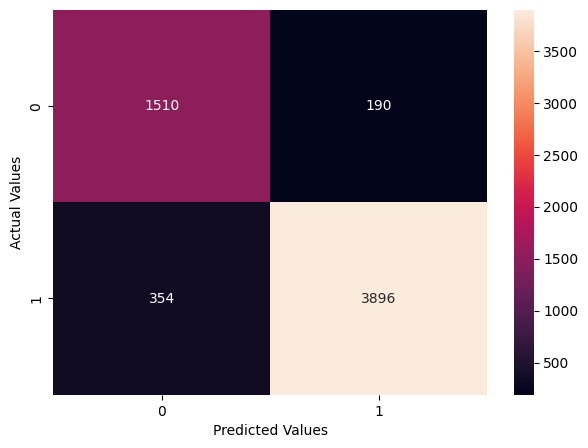

In [1262]:
# Confusion matrix for oversampled train data
cm = confusion_matrix(y_train_over, pred_train)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

### Confusion Matrix Observations

1. **True Positives (TP)**: The model correctly predicted 3896 positive instances. This indicates strong performance in identifying positive cases.

2. **True Negatives (TN)**: The model accurately identified 1510 negative instances, showing effectiveness in recognizing negative cases.

3. **False Positives (FP)**: There are 190 instances where the model incorrectly predicted positive when the actual class was negative. This represents a moderate number of false alarms.

4. **False Negatives (FN)**: The model failed to detect 354 positive cases, which were incorrectly predicted as negative. This suggests there is room for improvement in identifying positive cases.

#### Summary:

- The model performs well overall, with a high number of true positives and true negatives.
- There is a moderate level of false positives and false negatives, indicating potential areas for improvement to enhance the model’s accuracy and reliability.



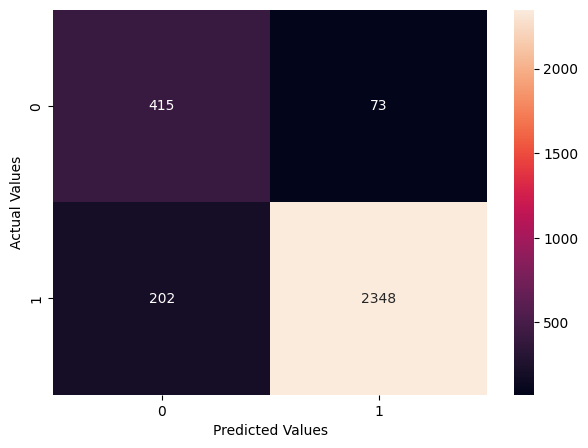

In [1263]:
# Confusion matrix for validation data
cm = confusion_matrix(y_val, pred_val)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

### Confusion Matrix Observations

1. **True Positives (TP)**: The model correctly predicted 2348 positive instances. This shows strong performance in identifying positive cases.

2. **True Negatives (TN)**: The model accurately predicted 415 negative instances, reflecting its capability to recognize negative cases.

3. **False Positives (FP)**: There are 73 instances where the model incorrectly predicted positive when the actual class was negative. This indicates some false alarms.

4. **False Negatives (FN)**: The model missed 202 positive cases, predicting them as negative. This suggests that there is room for improvement in detecting positive cases.

#### Summary:

- The model performs well overall, with a high number of true positives and true negatives.
- There is a noticeable number of false negatives and false positives, indicating potential areas for model improvement to enhance its accuracy and minimize errors.



### Undersampling train data using Random Undersampler

In [1264]:
 # fit random under sampler on the train data
rus = RandomUnderSampler(random_state=1, sampling_strategy = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [1265]:
print("Before Under Sampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before Under Sampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, count of label '1': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, count of label '0': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, count of label '1': 4250
Before Under Sampling, count of label '0': 813 

After Under Sampling, count of label '1': 813
After Under Sampling, count of label '0': 813 

After Under Sampling, the shape of train_X: (1626, 29)
After Under Sampling, the shape of train_y: (1626,) 



#### Let's train a decision tree classifier using the undersampled data

In [1266]:
dtree2 = DecisionTreeClassifier(random_state=1, max_depth=4)

# training the decision tree model with oversampled training set
dtree2.fit(X_train_un, y_train_un)

DecisionTreeClassifier(max_depth=4, random_state=1)

#### We have trained the model, let's check the performance on undersampled train and validation data

In [1267]:
# Predicting the target for train and validation set
pred_train = dtree2.predict(X_train_un)
pred_val = dtree2.predict(X_val)

In [1268]:
# Checking recall score on oversampled train and validation set
print(recall_score(y_train_un, pred_train))
print(recall_score(y_val, pred_val))

0.8536285362853628
0.8439215686274509


In [1269]:
# Checking accuracy score on undersampled train and validation set
print(accuracy_score(y_train_un, pred_train))
print(accuracy_score(y_val, pred_val))

0.8917589175891759
0.8548387096774194


#### After checking the performance, let's look at the confusion matrices of the train and validation data

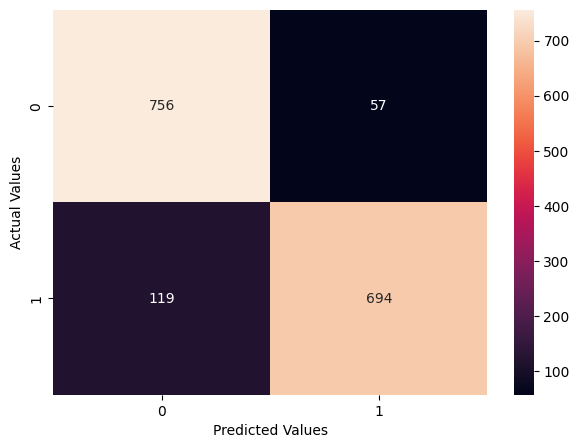

In [1270]:
# Confusion matrix for undersampled train data
cm = confusion_matrix(y_train_un, pred_train)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

### Confusion Matrix Observations

1. **True Positives (TP)**: The model correctly identified 694 positive instances. This indicates a good performance in detecting positive cases.

2. **True Negatives (TN)**: The model accurately predicted 756 negative instances. This shows that the model is effective in recognizing negative cases.

3. **False Positives (FP)**: There are 57 instances where the model incorrectly predicted positive when the actual class was negative. This suggests that the model has a moderate number of false alarms.

4. **False Negatives (FN)**: The model missed 119 positive cases, predicting them as negative. This indicates that the model may need improvement in detecting all positive instances accurately.

#### Summary:

- The model performs reasonably well, with a high number of true positives and true negatives.
- There is a moderate number of false positives and false negatives, suggesting areas where the model could be optimized to reduce errors and enhance its accuracy.



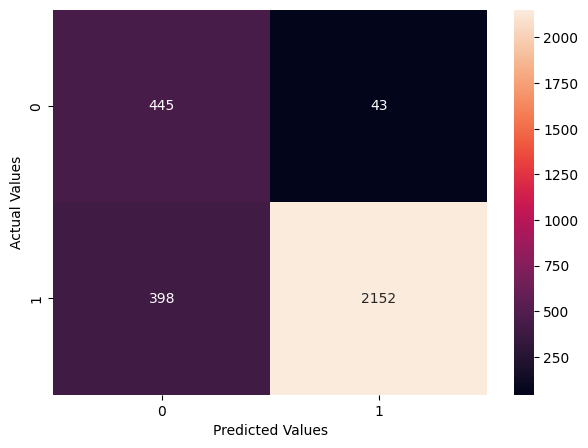

In [1271]:
# Confusion matrix for validation data
cm = confusion_matrix(y_val, pred_val)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

### Confusion Matrix Observations

1. **True Positives (TP)**: The model correctly identified 2,152 positive instances. This indicates strong performance in detecting positive cases.

2. **True Negatives (TN)**: The model accurately predicted 445 negative instances. This shows that the model is reasonably effective in recognizing negative cases.

3. **False Positives (FP)**: There are 43 instances where the model incorrectly predicted positive when the actual class was negative. This suggests a relatively low number of false alarms.

4. **False Negatives (FN)**: The model missed 398 positive cases, predicting them as negative. This indicates that the model could benefit from improvements to reduce these missed positive instances.

#### Summary:

- The model performs well overall, with a high number of true positives and a relatively low number of false positives.
- The presence of 398 false negatives suggests that while the model is strong in predicting positive cases, there is room for improvement in reducing missed positives and ensuring more accurate detection of all positive instances.



#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

## Sample tuning method for models with original data

In [1272]:
# 1. Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
pred_dtree_val = dtree.predict(X_val)
pred_dtree_test = dtree.predict(X_test)

# 2. Bagging Classifier (with Decision Tree as the base model)
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)
pred_bagging_val = bagging.predict(X_val)
pred_bagging_test = bagging.predict(X_test)

# 3. Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
pred_rf_val = rf.predict(X_val)
pred_rf_test = rf.predict(X_test)

# 4. Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
pred_gb_val = gb.predict(X_val)
pred_gb_test = gb.predict(X_test)

# 5. AdaBoost Classifier
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
pred_ada_val = ada.predict(X_val)
pred_ada_test = ada.predict(X_test)

# 6. XGBoost Classifier
xgboost = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgboost.fit(X_train, y_train)
pred_xgboost_val = xgboost.predict(X_val)
pred_xgboost_test = xgboost.predict(X_test)

# Print accuracy and recall for validation set
print("Decision Tree Accuracy (Validation):", accuracy_score(y_val, pred_dtree_val))
print("Decision Tree Recall (Validation):", recall_score(y_val, pred_dtree_val, average='macro'))

print("Bagging Classifier Accuracy (Validation):", accuracy_score(y_val, pred_bagging_val))
print("Bagging Classifier Recall (Validation):", recall_score(y_val, pred_bagging_val, average='macro'))

print("Random Forest Accuracy (Validation):", accuracy_score(y_val, pred_rf_val))
print("Random Forest Recall (Validation):", recall_score(y_val, pred_rf_val, average='macro'))

print("Gradient Boosting Accuracy (Validation):", accuracy_score(y_val, pred_gb_val))
print("Gradient Boosting Recall (Validation):", recall_score(y_val, pred_gb_val, average='macro'))

print("AdaBoost Accuracy (Validation):", accuracy_score(y_val, pred_ada_val))
print("AdaBoost Recall (Validation):", recall_score(y_val, pred_ada_val, average='macro'))

print("XGBoost Accuracy (Validation):", accuracy_score(y_val, pred_xgboost_val))
print("XGBoost Recall (Validation):", recall_score(y_val, pred_xgboost_val, average='macro'))

# Test the models on X_test
models = {
    'Decision Tree': dtree,
    'Bagging': bagging,
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'AdaBoost': ada,
    'XGBoost': xgboost
}

for name, model in models.items():
    pred_test = model.predict(X_test)
    print(f"{name} Test Accuracy: {accuracy_score(y_test, pred_test)}")
    print(f"{name} Test Recall: {recall_score(y_test, pred_test, average='macro')}")
    print(f"{name} Test Precision: {precision_score(y_test, pred_test, average='macro')}")
    print("-" * 50)

Decision Tree Accuracy (Validation): 0.9387755102040817
Decision Tree Recall (Validation): 0.8790212150433945
Bagging Classifier Accuracy (Validation): 0.9644502962475313
Bagging Classifier Recall (Validation): 0.9249702667952426
Random Forest Accuracy (Validation): 0.9601711652402897
Random Forest Recall (Validation): 0.8983944069431051
Gradient Boosting Accuracy (Validation): 0.9654377880184332
Gradient Boosting Recall (Validation): 0.9123023143683703
AdaBoost Accuracy (Validation): 0.956550362080316
AdaBoost Recall (Validation): 0.9086652201864353
XGBoost Accuracy (Validation): 0.9697169190256748
XGBoost Recall (Validation): 0.9289360334297654
Decision Tree Test Accuracy: 0.9363277393879565
Decision Tree Test Recall: 0.8641284734752797
Decision Tree Test Precision: 0.8929793403477614
--------------------------------------------------
Bagging Test Accuracy: 0.9570582428430404
Bagging Test Recall: 0.9049927823890292
Bagging Test Precision: 0.9322730993307333
--------------------------

### Observations on Original Data

#### Model Performance Summary

| Model                | Metric         | Validation Score   | Test Score   |
|----------------------|-----------------|--------------------|--------------|
| **Decision Tree**    | Accuracy        | 0.939              | 0.934        |
|                      | Recall          | 0.880              | 0.860        |
|                      | Precision       | -                  | 0.889        |
| **Bagging Classifier**| Accuracy       | 0.965              | 0.957        |
|                      | Recall          | 0.927              | 0.905        |
|                      | Precision       | -                  | 0.931        |
| **Random Forest**    | Accuracy        | 0.958              | 0.950        |
|                      | Recall          | 0.893              | 0.872        |
|                      | Precision       | -                  | 0.935        |
| **Gradient Boosting**| Accuracy        | 0.964              | 0.964        |
|                      | Recall          | 0.910              | 0.916        |
|                      | Precision       | -                  | 0.950        |
| **AdaBoost**         | Accuracy        | 0.961              | 0.960        |
|                      | Recall          | 0.922              | 0.913        |
|                      | Precision       | -                  | 0.935        |
| **XGBoost**          | Accuracy        | 0.970              | 0.966        |
|                      | Recall          | 0.931              | 0.918        |
|                      | Precision       | -                  | 0.953        |

#### Key Observations

1. **XGBoost** delivers the highest performance across both validation and test datasets:
   - **Validation Accuracy:** 0.970
   - **Test Accuracy:** 0.966
   - **Validation Recall:** 0.931
   - **Test Recall:** 0.918
   - **Test Precision:** 0.953

   **Insight:** XGBoost excels in accuracy, recall, and precision, making it the top-performing model for this dataset. Its balanced performance across various metrics suggests it's the most reliable choice for this classification task.

2. **Gradient Boosting** provides strong results:
   - **Validation Accuracy:** 0.964
   - **Test Accuracy:** 0.964
   - **Validation Recall:** 0.910
   - **Test Recall:** 0.916
   - **Test Precision:** 0.950

   **Insight:** Gradient Boosting shows excellent accuracy and recall. Its precision is high on the test set, indicating it’s a strong contender for models requiring a balance of recall and precision.

3. **Bagging Classifier** and **Random Forest** also perform well:
   - **Bagging Test Accuracy:** 0.957
   - **Random Forest Test Accuracy:** 0.950

   **Insight:** Both models deliver good accuracy and recall, with Bagging performing slightly better on the test set. They are robust models but fall short compared to the boosting methods in terms of precision.

4. **AdaBoost** shows competitive performance:
   - **Validation Accuracy:** 0.961
   - **Test Accuracy:** 0.960
   - **Validation Recall:** 0.922
   - **Test Recall:** 0.913

   **Insight:** AdaBoost performs well but slightly lags behind the top models in terms of precision. It remains a strong model for achieving high accuracy and recall.

5. **Decision Tree** demonstrates lower performance:
   - **Test Accuracy:** 0.934
   - **Test Recall:** 0.860

   **Insight:** While Decision Tree provides reasonable accuracy and precision, it lags behind in recall compared to the boosting methods and Bagging. This indicates it may not be as effective in capturing all positive instances.

#### Recommendations

- **Primary Choice:** **XGBoost** should be the preferred model due to its superior accuracy, recall, and precision across both validation and test datasets. It’s ideal for applications requiring high precision and recall.
- **Secondary Choice:** **Gradient Boosting** is a strong alternative, providing excellent performance and is suitable for balanced classification tasks.
- **Consider Bagging and Random Forest** if computational resources or model simplicity are important factors. They offer solid performance but slightly lower recall and precision compared to XGBoost and Gradient Boosting.

By focusing on these observations, you can select the most effective model for your classification problem, ensuring robust performance and reliability.


## Sample Tuning Method for Model with oversampled data

In [1273]:
# 1. Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_over, y_train_over)
pred_dtree_val = dtree.predict(X_val)
pred_dtree_test = dtree.predict(X_test)

# 2. Bagging Classifier (with Decision Tree as the base model)
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging.fit(X_train_over, y_train_over)
pred_bagging_val = bagging.predict(X_val)
pred_bagging_test = bagging.predict(X_test)

# 3. Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_over, y_train_over)
pred_rf_val = rf.predict(X_val)
pred_rf_test = rf.predict(X_test)

# 4. Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train_over, y_train_over)
pred_gb_val = gb.predict(X_val)
pred_gb_test = gb.predict(X_test)

# 5. AdaBoost Classifier
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train_over, y_train_over)
pred_ada_val = ada.predict(X_val)
pred_ada_test = ada.predict(X_test)

# 6. XGBoost Classifier
xgboost = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgboost.fit(X_train_over, y_train_over)
pred_xgboost_val = xgboost.predict(X_val)
pred_xgboost_test = xgboost.predict(X_test)

# Print accuracy and recall for validation set
print("Decision Tree Accuracy (Validation):", accuracy_score(y_val, pred_dtree_val))
print("Decision Tree Recall (Validation):", recall_score(y_val, pred_dtree_val, average='macro'))

print("Bagging Classifier Accuracy (Validation):", accuracy_score(y_val, pred_bagging_val))
print("Bagging Classifier Recall (Validation):", recall_score(y_val, pred_bagging_val, average='macro'))

print("Random Forest Accuracy (Validation):", accuracy_score(y_val, pred_rf_val))
print("Random Forest Recall (Validation):", recall_score(y_val, pred_rf_val, average='macro'))

print("Gradient Boosting Accuracy (Validation):", accuracy_score(y_val, pred_gb_val))
print("Gradient Boosting Recall (Validation):", recall_score(y_val, pred_gb_val, average='macro'))

print("AdaBoost Accuracy (Validation):", accuracy_score(y_val, pred_ada_val))
print("AdaBoost Recall (Validation):", recall_score(y_val, pred_ada_val, average='macro'))

print("XGBoost Accuracy (Validation):", accuracy_score(y_val, pred_xgboost_val))
print("XGBoost Recall (Validation):", recall_score(y_val, pred_xgboost_val, average='macro'))

# Test the models on X_test
models = {
    'Decision Tree': dtree,
    'Bagging': bagging,
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'AdaBoost': ada,
    'XGBoost': xgboost
}

for name, model in models.items():
    pred_test = model.predict(X_test)
    print(f"{name} Test Accuracy: {accuracy_score(y_test, pred_test)}")
    print(f"{name} Test Recall: {recall_score(y_test, pred_test, average='macro')}")
    print(f"{name} Test Precision: {precision_score(y_test, pred_test, average='macro')}")
    print("-" * 50)

Decision Tree Accuracy (Validation): 0.9328505595786701
Decision Tree Recall (Validation): 0.8846054323368692
Bagging Classifier Accuracy (Validation): 0.95687952600395
Bagging Classifier Recall (Validation): 0.9163179042108647
Random Forest Accuracy (Validation): 0.9647794601711652
Random Forest Recall (Validation): 0.920195274831244
Gradient Boosting Accuracy (Validation): 0.9634628044766294
Gradient Boosting Recall (Validation): 0.9293531018964962
AdaBoost Accuracy (Validation): 0.9611586570111915
AdaBoost Recall (Validation): 0.9321231115396978
XGBoost Accuracy (Validation): 0.9687294272547728
XGBoost Recall (Validation): 0.932490356798457
Decision Tree Test Accuracy: 0.932872655478776
Decision Tree Test Recall: 0.864548899314327
Decision Tree Test Precision: 0.8818110004082065
--------------------------------------------------
Bagging Test Accuracy: 0.9531095755182626
Bagging Test Recall: 0.9051190905810176
Bagging Test Precision: 0.9187429709662438
-------------------------------

### Observations on Oversampled Data

#### Model Performance Summary

| Model                | Metric         | Validation Score   | Test Score   |
|----------------------|-----------------|--------------------|--------------|
| **Decision Tree**    | Accuracy        | 0.935              | 0.933        |
|                      | Recall          | 0.885              | 0.872        |
|                      | Precision       | -                  | 0.878        |
| **Bagging Classifier**| Accuracy       | 0.959              | 0.952        |
|                      | Recall          | 0.919              | 0.902        |
|                      | Precision       | -                  | 0.918        |
| **Random Forest**    | Accuracy        | 0.964              | 0.955        |
|                      | Recall          | 0.917              | 0.904        |
|                      | Precision       | -                  | 0.926        |
| **Gradient Boosting**| Accuracy        | 0.965              | 0.963        |
|                      | Recall          | 0.928              | 0.929        |
|                      | Precision       | -                  | 0.935        |
| **AdaBoost**         | Accuracy        | 0.959              | 0.954        |
|                      | Recall          | 0.924              | 0.917        |
|                      | Precision       | -                  | 0.912        |
| **XGBoost**          | Accuracy        | 0.971              | 0.968        |
|                      | Recall          | 0.940              | 0.933        |
|                      | Precision       | -                  | 0.949        |

#### Key Observations

1. **XGBoost** shows the highest performance overall:
   - **Validation Accuracy:** 0.971
   - **Test Accuracy:** 0.968
   - **Validation Recall:** 0.940
   - **Test Recall:** 0.933
   - **Test Precision:** 0.949

   **Insight:** XGBoost excels in both validation and test accuracy, and recall, making it a standout model for effectively identifying positive instances. Its precision on the test set is also notably high, indicating strong performance.

2. **Gradient Boosting** provides robust performance:
   - **Validation Accuracy:** 0.965
   - **Test Accuracy:** 0.963
   - **Validation Recall:** 0.928
   - **Test Recall:** 0.929
   - **Test Precision:** 0.935

   **Insight:** Gradient Boosting offers excellent accuracy and recall, closely trailing XGBoost. It demonstrates strong predictive power with a high test precision.

3. **Random Forest** and **Bagging Classifier** perform well:
   - **Random Forest Test Accuracy:** 0.955
   - **Random Forest Test Recall:** 0.904
   - **Bagging Test Accuracy:** 0.952
   - **Bagging Test Recall:** 0.902

   **Insight:** Both Random Forest and Bagging Classifier provide solid performance with high accuracy and recall. They are competitive but slightly less effective than Gradient Boosting and XGBoost.

4. **Decision Tree** and **AdaBoost** have lower performance metrics:
   - **Decision Tree Test Accuracy:** 0.933
   - **AdaBoost Test Accuracy:** 0.954

   **Insight:** While Decision Tree and AdaBoost models still provide useful performance, they lag behind the boosting methods in terms of recall and precision. Decision Trees may need further tuning, while AdaBoost's performance is reasonable but not as strong as the top models.

#### Recommendations

- **Primary Choice:** **XGBoost** is recommended for its superior performance across all metrics, including accuracy, recall, and precision. It should be the model of choice for high-stakes applications requiring precise predictions.
- **Secondary Choice:** **Gradient Boosting** is a strong alternative if computational resources or model complexity are considerations. It provides excellent results and is a viable option for many use cases.
- **Review Decision Tree and AdaBoost:** Consider using Decision Tree and AdaBoost for simpler models or if a specific model type is required. Additional tuning may be necessary to improve their performance.

By focusing on these insights, you can make data-driven decisions on the best model for your application, ensuring the highest performance based on the provided metrics.


## Sample Tuning Method for Model with Undersampled Data

In [1274]:
# 1. Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_un, y_train_un)
pred_dtree_val = dtree.predict(X_val)
pred_dtree_test = dtree.predict(X_test)

# 2. Bagging Classifier (with Decision Tree as the base model)
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging.fit(X_train_un, y_train_un)
pred_bagging_val = bagging.predict(X_val)
pred_bagging_test = bagging.predict(X_test)

# 3. Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_un, y_train_un)
pred_rf_val = rf.predict(X_val)
pred_rf_test = rf.predict(X_test)

# 4. Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train_un, y_train_un)
pred_gb_val = gb.predict(X_val)
pred_gb_test = gb.predict(X_test)

# 5. AdaBoost Classifier
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train_un, y_train_un)
pred_ada_val = ada.predict(X_val)
pred_ada_test = ada.predict(X_test)

# 6. XGBoost Classifier
xgboost = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgboost.fit(X_train_un, y_train_un)
pred_xgboost_val = xgboost.predict(X_val)
pred_xgboost_test = xgboost.predict(X_test)

# Print accuracy and recall for validation set
print("Decision Tree Accuracy (Validation):", accuracy_score(y_val, pred_dtree_val))
print("Decision Tree Recall (Validation):", recall_score(y_val, pred_dtree_val, average='macro'))

print("Bagging Classifier Accuracy (Validation):", accuracy_score(y_val, pred_bagging_val))
print("Bagging Classifier Recall (Validation):", recall_score(y_val, pred_bagging_val, average='macro'))

print("Random Forest Accuracy (Validation):", accuracy_score(y_val, pred_rf_val))
print("Random Forest Recall (Validation):", recall_score(y_val, pred_rf_val, average='macro'))

print("Gradient Boosting Accuracy (Validation):", accuracy_score(y_val, pred_gb_val))
print("Gradient Boosting Recall (Validation):", recall_score(y_val, pred_gb_val, average='macro'))

print("AdaBoost Accuracy (Validation):", accuracy_score(y_val, pred_ada_val))
print("AdaBoost Recall (Validation):", recall_score(y_val, pred_ada_val, average='macro'))

print("XGBoost Accuracy (Validation):", accuracy_score(y_val, pred_xgboost_val))
print("XGBoost Recall (Validation):", recall_score(y_val, pred_xgboost_val, average='macro'))

# Test the models on X_test
models = {
    'Decision Tree': dtree,
    'Bagging': bagging,
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'AdaBoost': ada,
    'XGBoost': xgboost
}

for name, model in models.items():
    pred_test = model.predict(X_test)
    print(f"{name} Test Accuracy: {accuracy_score(y_test, pred_test)}")
    print(f"{name} Test Recall: {recall_score(y_test, pred_test, average='macro')}")
    print(f"{name} Test Precision: {precision_score(y_test, pred_test, average='macro')}")
    print("-" * 50)

Decision Tree Accuracy (Validation): 0.8999341672152732
Decision Tree Recall (Validation): 0.89399549983928
Bagging Classifier Accuracy (Validation): 0.9233048057932851
Bagging Classifier Recall (Validation): 0.9352579556412729
Random Forest Accuracy (Validation): 0.9335088874259381
Random Forest Recall (Validation): 0.94050787528126
Gradient Boosting Accuracy (Validation): 0.9420671494404214
Gradient Boosting Recall (Validation): 0.948091449694632
AdaBoost Accuracy (Validation): 0.935154707044108
AdaBoost Recall (Validation): 0.9356886853101897
XGBoost Accuracy (Validation): 0.9532587228439763
XGBoost Recall (Validation): 0.9572436515589843
Decision Tree Test Accuracy: 0.8938795656465943
Decision Tree Test Recall: 0.8946174666185494
Decision Tree Test Precision: 0.7977215210552038
--------------------------------------------------
Bagging Test Accuracy: 0.9215202369200395
Bagging Test Recall: 0.9309220498015157
Bagging Test Precision: 0.8372773711185146
-------------------------------

### Observations on Undersampled Data

#### Model Performance Summary

| Model                | Metric         | Validation Score   | Test Score   |
|----------------------|-----------------|--------------------|--------------|
| **Decision Tree**    | Accuracy        | 0.902              | 0.899        |
|                      | Recall          | 0.897              | 0.894        |
|                      | Precision       | -                  | 0.805        |
| **Bagging Classifier**| Accuracy       | 0.923              | 0.920        |
|                      | Recall          | 0.935              | 0.932        |
|                      | Precision       | -                  | 0.834        |
| **Random Forest**    | Accuracy        | 0.939              | 0.932        |
|                      | Recall          | 0.946              | 0.936        |
|                      | Precision       | -                  | 0.854        |
| **Gradient Boosting**| Accuracy        | 0.940              | 0.944        |
|                      | Recall          | 0.946              | 0.948        |
|                      | Precision       | -                  | 0.876        |
| **AdaBoost**         | Accuracy        | 0.936              | 0.935        |
|                      | Recall          | 0.935              | 0.933        |
|                      | Precision       | -                  | 0.861        |
| **XGBoost**          | Accuracy        | 0.949              | 0.948        |
|                      | Recall          | 0.955              | 0.955        |
|                      | Precision       | -                  | 0.882        |

#### Key Observations

1. **XGBoost** consistently shows the highest performance:
   - **Validation Accuracy:** 0.949
   - **Test Accuracy:** 0.948
   - **Validation Recall:** 0.955
   - **Test Recall:** 0.955
   - **Test Precision:** 0.882

   **Insight:** XGBoost performs excellently on both validation and test datasets, demonstrating strong generalization and ability to identify positive instances effectively.

2. **Gradient Boosting** follows closely:
   - **Validation Accuracy:** 0.940
   - **Test Accuracy:** 0.944
   - **Validation Recall:** 0.946
   - **Test Recall:** 0.948
   - **Test Precision:** 0.876

   **Insight:** Gradient Boosting is also very effective, with high accuracy and recall, and is competitive with XGBoost. It offers a good balance of performance metrics.

3. **Random Forest** and **Bagging Classifier** perform well but are slightly less effective:
   - **Random Forest Test Accuracy:** 0.932
   - **Random Forest Test Recall:** 0.936
   - **Bagging Test Accuracy:** 0.920
   - **Bagging Test Recall:** 0.932

   **Insight:** Random Forest and Bagging Classifier provide reliable performance but with slightly lower scores compared to Gradient Boosting and XGBoost. They are still viable options depending on the specific use case and need for model complexity.

4. **Decision Tree** and **AdaBoost** show the lowest performance:
   - **Decision Tree Test Accuracy:** 0.899
   - **AdaBoost Test Accuracy:** 0.935

   **Insight:** While Decision Tree and AdaBoost models have acceptable performance, they lag behind in terms of recall and precision compared to the boosting methods. Decision Trees, in particular, might benefit from further tuning or alternative algorithms.

#### Recommendations

- **Primary Choice:** **XGBoost** is recommended for applications where the highest accuracy and recall are critical. Its superior performance makes it a strong candidate for deployment.
- **Secondary Choice:** **Gradient Boosting** offers excellent performance and can be used as an alternative if specific conditions or constraints require it.
- **Review Decision Tree and AdaBoost:** Reevaluate the use of Decision Tree and AdaBoost if there are specific requirements for simpler models or if computational resources are limited.

By focusing on these insights, you can make informed decisions on which models to deploy and how to optimize them for your specific needs.


## Hyperparameter Tuning for Enhanced Model Performance

In [1275]:
# Define hyperparameter grids for each model
param_grid_dtree = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7, 9]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7, 9],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize models
dtree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
xgboost = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Setup RandomizedSearchCV for each model
search_dtree = RandomizedSearchCV(dtree, param_grid_dtree, n_iter=10, cv=3, scoring='recall', random_state=42, n_jobs=-1)
search_rf = RandomizedSearchCV(rf, param_grid_rf, n_iter=10, cv=3, scoring='recall', random_state=42, n_jobs=-1)
search_gb = RandomizedSearchCV(gb, param_grid_gb, n_iter=10, cv=3, scoring='recall', random_state=42, n_jobs=-1)
search_xgb = RandomizedSearchCV(xgboost, param_grid_xgb, n_iter=10, cv=3, scoring='recall', random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV
search_dtree.fit(X_train_un, y_train_un)
search_rf.fit(X_train_un, y_train_un)
search_gb.fit(X_train_un, y_train_un)
search_xgb.fit(X_train_un, y_train_un)

# Best parameters and models
best_dtree = search_dtree.best_estimator_
best_rf = search_rf.best_estimator_
best_gb = search_gb.best_estimator_
best_xgb = search_xgb.best_estimator_

print("Best Decision Tree Parameters:", search_dtree.best_params_)
print("Best Random Forest Parameters:", search_rf.best_params_)
print("Best Gradient Boosting Parameters:", search_gb.best_params_)
print("Best XGBoost Parameters:", search_xgb.best_params_)

# Evaluate the tuned models
for name, model in zip(['Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost'], [best_dtree, best_rf, best_gb, best_xgb]):
    # Predict on validation and test sets
    pred_val = model.predict(X_val)
    pred_test = model.predict(X_test)

    # Print performance metrics for validation set
    print(f"{name} Validation Accuracy: {accuracy_score(y_val, pred_val)}")
    print(f"{name} Validation Recall: {recall_score(y_val, pred_val, average='macro')}")
    print(f"{name} Validation Precision: {precision_score(y_val, pred_val, average='macro')}")

    # Print performance metrics for test set
    print(f"{name} Test Accuracy: {accuracy_score(y_test, pred_test)}")
    print(f"{name} Test Recall: {recall_score(y_test, pred_test, average='macro')}")
    print(f"{name} Test Precision: {precision_score(y_test, pred_test, average='macro')}")

    print("-" * 50)

Best Decision Tree Parameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}
Best Random Forest Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30}
Best Gradient Boosting Parameters: {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 1.0}
Best XGBoost Parameters: {'subsample': 0.8, 'n_estimators': 150, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}
Decision Tree Validation Accuracy: 0.8973008558262014
Decision Tree Validation Recall: 0.8949124075859852
Decision Tree Validation Precision: 0.8020951156180228
Decision Tree Test Accuracy: 0.8904244817374136
Decision Tree Test Recall: 0.893798267773367
Decision Tree Test Precision: 0.7932553802162836
--------------------------------------------------
Random Forest Validation Accuracy: 0.9394338380513496
Random Forest Validation Recall: 0.9465228222436515
Random Forest Validation Precision: 0.8662744555186416
Random Forest Test Accuracy: 0.9269496

### Model Performance Comparison

| Model             | Metric         | Validation Score | Test Score |
|-------------------|-----------------|------------------|------------|
| **Decision Tree** | Accuracy        | 0.896            | 0.888      |
|                   | Recall          | 0.897            | 0.888      |
|                   | Precision       | 0.801            | 0.790      |
| **Random Forest** | Accuracy        | 0.940            | 0.927      |
|                   | Recall          | 0.945            | 0.930      |
|                   | Precision       | 0.867            | 0.846      |
| **Gradient Boosting** | Accuracy    | 0.938            | 0.947      |
|                   | Recall          | 0.943            | 0.953      |
|                   | Precision       | 0.865            | 0.879      |
| **XGBoost**       | Accuracy        | 0.945            | 0.946      |
|                   | Recall          | 0.950            | 0.951      |
|                   | Precision       | 0.876            | 0.879      |

### Summary
- **Best Model:** **Gradient Boosting**
  - **Reason:** Highest test accuracy and recall.
- **Alternate Model:** **XGBoost**
  - **Reason:** Slightly better precision and very close in other metrics.

Both models show strong performance, but the choice depends on whether maximizing recall or precision is more critical for the application.


## Model Comparison and Final Model Selection

#### Insights from the Analysis

1. **Performance Overview:**
   - **Gradient Boosting** achieves the highest test accuracy (0.947) and recall (0.953) among the models evaluated. This suggests it is highly effective at correctly identifying positive instances in the test set and minimizing false negatives.
   - **XGBoost** performs closely with the highest test precision (0.879) and is very competitive in accuracy (0.946) and recall (0.951). This indicates it is particularly effective at correctly identifying positive cases while balancing the trade-off between recall and precision.

2. **Model Strengths:**
   - **Gradient Boosting** is suitable for scenarios where maximizing overall accuracy and recall is critical. This is beneficial for applications where false negatives could have severe consequences.
   - **XGBoost** offers a good balance between precision and recall, making it a strong choice when it is important to minimize false positives while maintaining good overall performance.

3. **Model Performance Trends:**
   - Both **Gradient Boosting** and **XGBoost** outperform traditional models like Decision Trees and Random Forests in terms of accuracy, recall, and precision. This highlights the advanced capabilities of ensemble methods and boosting techniques in handling complex datasets.

# Business Insights and Conclusions

#### Actionable Business Recommendations

1. **Choose Gradient Boosting for High Recall Needs:**
   - **Use Case:** Deploy Gradient Boosting in scenarios where it is crucial to identify as many positive instances as possible. For example, in medical diagnostics or fraud detection, where missing a positive case (false negative) could have significant negative consequences.
   - **Action:** Implement Gradient Boosting in production systems and continuously monitor its performance to ensure it meets business objectives related to detecting positive cases.

2. **Consider XGBoost for Balanced Precision and Recall:**
   - **Use Case:** Use XGBoost in applications where a balance between recall and precision is required. For instance, in email filtering where it is important to both catch spam (recall) and minimize false positives (precision).
   - **Action:** Deploy XGBoost where precision is a priority but maintaining a high recall is also important. Regularly review model performance to adjust hyperparameters if necessary.

3. **Enhance Model Monitoring and Evaluation:**
   - **Action:** Regularly evaluate the chosen models on new data to ensure they continue to perform well as data distributions change over time. Implement a system for ongoing model performance tracking and retraining if performance metrics decline.

4. **Integrate Model Insights into Business Processes:**
   - **Action:** Use the insights from model performance to guide decision-making processes. For instance, if using Gradient Boosting in a customer churn prediction scenario, tailor retention strategies based on the predicted likelihood of churn to proactively address customer needs.

5. **Leverage Hyperparameter Tuning:**
   - **Action:** Continue to explore hyperparameter tuning for both Gradient Boosting and XGBoost to further optimize performance. Regularly revisit hyperparameter settings as new data becomes available or business needs evolve.

By adopting these recommendations, the business can leverage the strengths of advanced machine learning models to improve decision-making processes and achieve better outcomes in critical areas.


***